This is my first project. It's just EDA because  is as far as my knowledge can get me. **Any comments are welcome.**

It was motivated by Google Data Analytics Professional Certificate course. 
The hypothetical scenario is simple: give new marketing strategy to a a bike-sharing company in order to convert casual riders into annual subscription paying members.  

Three questions to guide the future marketing program:
1. How do annual members and casual riders use bikes differently?
2. Why would casual riders buy annual memberships?
3. How can we use digital media to influence casual riders to become members

I'll use data from [Divvy](http://https://www.divvybikes.com/) witch is a bike-sharing company operating in Chicago, IL, USA.

As it is my first project I was mostly driven by curiosity and experimenting. Most of the code I wrote didn't even make it here.
The first 4 parts are about merging, transforming and feature engineering.
You can go strait to the number 5 for EDA and analysis. (click  there ->)  


In [1]:
install.packages("lubridate")
library(lubridate)
library(tidyverse) # metapackage of all tidyverse packages
install.packages("pastecs")  
library(pastecs)
library(geosphere)
install.packages("moments")
library(moments)
library(dygraphs)
library(xts)  

library(openintro)
library(maps)
library(ggmap)
library(ggthemes)
library(ggplot2)

install.packages("reshape")                                       
library("reshape")  

install.packages("collapsibleTree")
library(collapsibleTree) 

list.files(path = "../input")

fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

#full_data_2020 <- read_csv("../input/data-2020-3/full_data_2020")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘pastecs’


The following objects are

[1] "cyclistic-dataset-google-certificate-capstone"

# 1. Import the data

In [2]:
list_2020 <- list( "../input/cyclistic-dataset-google-certificate-capstone/Divvy_Trips_2020_Q1.csv", "../input/cyclistic-dataset-google-certificate-capstone/202004-divvy-tripdata.csv", "../input/cyclistic-dataset-google-certificate-capstone/202005-divvy-tripdata.csv", "../input/cyclistic-dataset-google-certificate-capstone/202006-divvy-tripdata.csv", "../input/cyclistic-dataset-google-certificate-capstone/202007-divvy-tripdata.csv", "../input/cyclistic-dataset-google-certificate-capstone/202008-divvy-tripdata.csv", "../input/cyclistic-dataset-google-certificate-capstone/202009-divvy-tripdata.csv", "../input/cyclistic-dataset-google-certificate-capstone/202010-divvy-tripdata.csv", "../input/cyclistic-dataset-google-certificate-capstone/202011-divvy-tripdata.csv", "../input/cyclistic-dataset-google-certificate-capstone/202012-divvy-tripdata.csv")
names(list_2020) <- c("Q1", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")

for (val in 1:10){ list_2020[[val]] <- read_csv(list_2020[[val]]) }

#Check dimensions 
for (val in 1:10){print(paste(str(names(list_2020)[[val]]) ,dim(list_2020[[val]]) ))}

#combine data for 2020 in one dataframe
data_2020 <- do.call("rbind", list_2020)


# data validation : if TRUE the number rows match the sum of all the arts being merge 
temp <- list()
for (val in 1:10){ temp <- append(temp,nrow(list_2020[[val]]) )}
do.call(sum,temp) == nrow(data_2020) 


#save the dataset 
#write.csv(data_2020,file = "data_2020" )

Rows: 426887 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 84776 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 200274 Columns: 13

── Column specification ───────────

 chr "Q1"
[1] " 426887" " 13"    
 chr "Apr"
[1] " 84776" " 13"   
 chr "May"
[1] " 200274" " 13"    
 chr "Jun"
[1] " 343005" " 13"    
 chr "Jul"
[1] " 551480" " 13"    
 chr "Aug"
[1] " 622361" " 13"    
 chr "Sep"
[1] " 532958" " 13"    
 chr "Oct"
[1] " 388653" " 13"    
 chr "Nov"
[1] " 259716" " 13"    
 chr "Dec"
[1] " 131573" " 13"    


[1] TRUE

# 2. Checking the data


In [3]:
head(data_2020)

ride_id          rideable_type started_at          ended_at           
1 EACB19130B0CDA4A docked_bike   2020-01-21 20:06:59 2020-01-21 20:14:30
2 8FED874C809DC021 docked_bike   2020-01-30 14:22:39 2020-01-30 14:26:22
3 789F3C21E472CA96 docked_bike   2020-01-09 19:29:26 2020-01-09 19:32:17
4 C9A388DAC6ABF313 docked_bike   2020-01-06 16:17:07 2020-01-06 16:25:56
5 943BC3CBECCFD662 docked_bike   2020-01-30 08:37:16 2020-01-30 08:42:48
6 6D9C8A6938165C11 docked_bike   2020-01-10 12:33:05 2020-01-10 12:37:54
  start_station_name       start_station_id end_station_name              
1 Western Ave & Leland Ave 239              Clark St & Leland Ave         
2 Clark St & Montrose Ave  234              Southport Ave & Irving Park Rd
3 Broadway & Belmont Ave   296              Wilton Ave & Belmont Ave      
4 Clark St & Randolph St   51               Fairbanks Ct & Grand Ave      
5 Clinton St & Lake St     66               Wells St & Hubbard St         
6 Wells St & Hubbard St    212              Desplaines St & Randolph St   
  end_station_id start_lat start_lng end_lat end_lng  member_casual
1 326            41.9665   -87.6884  41.9671 -87.6674 member       
2 318            41.9616   -87.6660  41.9542 -87.6644 member       
3 117            41.9401   -87.6455  41.9402 -87.6530 member       
4 24             41.8846   -87.6319  41.8918 -87.6206 member       
5 212            41.8856   -87.6418  41.8899 -87.6343 member       
6 96             41.8899   -87.6343  41.8846 -87.6446 member

In [4]:
#  is ride_id unique
nrow(data_2020)-length(unique(data_2020$ride_id))

# Let me take a look
list_duplicated <- data_2020[duplicated(data_2020$ride_id),]$ride_id
data_duplicates <- data_2020[data_2020$ride_id %in% list_duplicated,]
data_duplicates_ordered <- data_duplicates[order(data_duplicates$ride_id) , ]

#Check the first 5 pairs
head(data_duplicates_ordered,10)

[1] 209

ride_id          rideable_type started_at          ended_at           
1  021A73F8C18B932D docked_bike   2020-11-25 16:35:39 2020-11-25 16:48:02
2  021A73F8C18B932D docked_bike   2020-12-15 12:15:58 2020-11-25 16:48:02
3  0334987B57662109 docked_bike   2020-11-25 16:15:04 2020-11-25 16:22:04
4  0334987B57662109 docked_bike   2020-12-15 11:56:33 2020-11-25 16:22:04
5  038CAB4A84D9A56B docked_bike   2020-11-25 16:08:05 2020-11-25 16:24:56
6  038CAB4A84D9A56B docked_bike   2020-12-15 11:57:41 2020-11-25 16:24:56
7  0425DA22910BD202 docked_bike   2020-11-25 08:32:26 2020-11-25 08:49:25
8  0425DA22910BD202 docked_bike   2020-12-15 11:37:02 2020-11-25 08:49:25
9  05498BABECEB55B0 docked_bike   2020-11-25 08:42:12 2020-11-25 08:51:27
10 05498BABECEB55B0 docked_bike   2020-12-15 12:11:52 2020-11-25 08:51:27
   start_station_name           start_station_id
1  Clark St & Winnemac Ave      325             
2  Clark St & Winnemac Ave      TA1309000035    
3  Broadway & Berwyn Ave        294             
4  Broadway & Berwyn Ave        13109           
5  Wabash Ave & 9th St          321             
6  Wabash Ave & 9th St          TA1309000010    
7  Desplaines St & Jackson Blvd 107             
8  Desplaines St & Jackson Blvd 15539           
9  Clinton St & Madison St      77              
10 Clinton St & Madison St      TA1305000032    
   end_station_name                end_station_id start_lat start_lng end_lat 
1  Ravenswood Ave & Berteau Ave    314            41.97335  -87.66786 41.95792
2  Ravenswood Ave & Berteau Ave    TA1309000018   41.97335  -87.66786 41.95792
3  Lakefront Trail & Bryn Mawr Ave 459            41.97835  -87.65975 41.98404
4  Lakefront Trail & Bryn Mawr Ave KA1504000152   41.97835  -87.65975 41.98404
5  Wabash Ave & 9th St             321            41.87077  -87.62573 41.87077
6  Wabash Ave & 9th St             TA1309000010   41.87077  -87.62573 41.87077
7  Stetson Ave & South Water St    264            41.87829  -87.64391 41.88683
8  Stetson Ave & South Water St    TA1308000029   41.87829  -87.64391 41.88683
9  Cityfront Plaza Dr & Pioneer Ct 196            41.88224  -87.64107 41.89057
10 Cityfront Plaza Dr & Pioneer Ct 13427          41.88224  -87.64107 41.89057
   end_lng   member_casual
1  -87.67357 member       
2  -87.67357 member       
3  -87.65231 member       
4  -87.65231 member       
5  -87.62573 member       
6  -87.62573 member       
7  -87.62232 member       
8  -87.62232 member       
9  -87.62207 member       
10 -87.62207 member

### Removing 418 rows from data_2020

In [5]:
test_data_2020 <-  data_2020[!(data_2020$ride_id %in% list_duplicated),]
c <- nrow(data_2020) -418 
c == nrow(test_data_2020) 
data_2020 <- test_data_2020
colSums(is.na(data_2020))

[1] TRUE

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
             94656              95282             110879             111340 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               4253               4253 
     member_casual 
                 0

all the rows that are missing `end_lat` are also missing station name and station id , there is no away to match so I'll remove those rows 

### Remove missing data

In [6]:
#removing 4253 missing in latitude and longitude 


data_2020 <- data_2020[!is.na(data_2020$end_lat),]

nrow(data_2020) == 3537012
colSums(is.na(data_2020))


[1] TRUE

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
             94656              95282             106626             107087 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                  0                  0 
     member_casual 
                 0

# 3. Transformations
* For location I only need latitude, longitude and a unique id
* I'll create my own id, since some of the ids are missing

### 1. Unique combos of latitude and longitude for both start and end 

In [7]:
# 1. Unique combos of lat and lng for both years and both start and end
start_2020 <- rename(unique(data_2020[,c("start_lat","start_lng")]),replace =c( "start_lat"="lat", "start_lng"="lng"))  
end_2020 <- rename(unique(data_2020[,c("end_lat","end_lng")]),replace =c( "end_lat"="lat", "end_lng"="lng"))  


# 2. Merge for each year & add a new id

m_2020 <- merge(start_2020, end_2020,all.x=TRUE, all.y=TRUE)
m_2020$index <- 1:nrow(m_2020)



# 3. Match with original dat & rename the new id column

test_2020 <- data_2020
m_test_2020 <- merge(test_2020,m_2020, by.x= c("start_lat", "start_lng"), by.y=c("lat","lng"), all.x=TRUE )
m_test_2020<- rename(m_test_2020,replace=c( "index"="index_start"))
m_test_2020 <- merge(m_test_2020,m_2020, by.x= c("end_lat", "end_lng"), by.y=c("lat","lng"), all.x=TRUE )
dim(m_test_2020)
m_test_2020<- rename(m_test_2020,replace= c( "index"="index_end" ))



# 4. Substitute the old ids for the new ones & remove station name

data_2020<- m_test_2020[,c("end_lat", "end_lng", "index_end","start_lat" ,"start_lng","index_start" , "ride_id", "rideable_type","started_at","ended_at","member_casual")]
dim(data_2020)
colSums(is.na(data_2020))

[1] 3537012      15

[1] 3537012      11

end_lat       end_lng     index_end     start_lat     start_lng 
            0             0             0             0             0 
  index_start       ride_id rideable_type    started_at      ended_at 
            0             0             0             0             0 
member_casual 
            0

## Check time integrity

In [8]:
# 1. Check for date inconsistency
diff_time <- data_2020$ended_at - data_2020$started_at
cond <- diff_time <= 0
diff_time_data <- data_2020[cond,]
nrow(diff_time_data)
 
#  2. Check it out

head(diff_time_data)



# 3. Can't fix? Remove it

#2020
#3,537,012 - 10,855 =  3526157
data_2020 <- data_2020[diff_time > 0,]
nrow(data_2020) ==  3526157

[1] 10855

end_lat  end_lng   index_end start_lat start_lng index_start
1308  41.70000 -87.65000  916      41.69130  -87.71280  691       
1810  41.71000 -87.65000 1381      41.71000  -87.65000 1381       
7416  41.74462 -87.55121 3758      41.76641  -87.56569 6960       
10168 41.75220 -87.66370 4813      41.75220  -87.66370 4811       
10822 41.75712 -87.57584 5014      41.76219  -87.55927 5912       
11114 41.75787 -87.54939 5092      41.75173  -87.55281 4637       
      ride_id          rideable_type started_at          ended_at           
1308  B816A83C2E37ED0A electric_bike 2020-12-15 12:12:15 2020-11-25 22:50:26
1810  494D20EB60328B6A electric_bike 2020-10-13 17:53:00 2020-10-13 17:53:00
7416  EAE1E120483480C5 docked_bike   2020-07-12 18:11:06 2020-07-12 18:11:03
10168 E7B2264112991CC5 docked_bike   2020-08-31 00:46:00 2020-08-31 00:45:58
10822 6113AA7F9CF786D0 docked_bike   2020-06-23 20:18:08 2020-06-23 20:18:03
11114 F7BF714F8B79C372 docked_bike   2020-07-02 19:31:02 2020-07-02 19:30:53
      member_casual
1308  casual       
1810  casual       
7416  member       
10168 casual       
10822 member       
11114 casual

[1] TRUE

* 10,855 rows where the end of the ride come before the start

# 4. Add variables

In [9]:
# 1. Distance

data_2020$distance <- distHaversine(matrix(c(data_2020$start_lng, data_2020$start_lat), ncol = 2),matrix(c(data_2020$end_lng, data_2020$end_lat), ncol = 2))



# 2. Month
data_2020$started_month <- month(data_2020$started_at)
data_2020$ended_month <- month(data_2020$ended_at)

nrow(data_2020[data_2020$started_month <= data_2020$ended_month  ,]) == nrow(data_2020) # all from december to january

#12 cases where the ride started 31th of Dec and ended the next day


# 3. Weekday

data_2020$weekday_start <- weekdays(data_2020$started_at)
data_2020$weekday_end <- weekdays(data_2020$ended_at)

# 4. Hour

data_2020$hour_start <- hm(format(as.POSIXct(data_2020$started_at,format="%H:%M:%S"),"%H:%M"))
data_2020$hour_end <- hm(format(as.POSIXct(data_2020$ended_at,format="%H:%M:%S"),"%H:%M"))

# 5. Time spent

data_2020$diff_hours <- difftime(data_2020$ended_at,data_2020$started_at, units = "hours")

# 6. Veloc

data_2020$diff_hours <- as.numeric(data_2020$diff_hours)
data_2020$veloc <- round((data_2020$distance/data_2020$diff_hours)*0.001,3) 

# 7. timeframe


temp <- data_2020

temp$timeframe <- temp$diff_hours

percentiles <- quantile(data_2020$diff_hours, probs = c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90))

temp$timeframe<-replace(temp$timeframe, temp$timeframe>=percentiles["90%"],10)
temp$timeframe<-replace(temp$timeframe, temp$timeframe< percentiles["10%"],1)
temp$timeframe<-replace(temp$timeframe, temp$timeframe>=percentiles["10%"] & temp$timeframe <percentiles["20%"],2)
temp$timeframe<-replace(temp$timeframe, temp$timeframe>=percentiles["20%"] & temp$timeframe <percentiles["30%"],3)
temp$timeframe<-replace(temp$timeframe, temp$timeframe>=percentiles["30%"] & temp$timeframe <percentiles["40%"],4)
temp$timeframe<-replace(temp$timeframe, temp$timeframe>=percentiles["40%"] & temp$timeframe <percentiles["50%"],5)
temp$timeframe<-replace(temp$timeframe, temp$timeframe>=percentiles["50%"] & temp$timeframe <percentiles["60%"],6)
temp$timeframe<-replace(temp$timeframe, temp$timeframe>=percentiles["60%"] & temp$timeframe <percentiles["70%"],7)
temp$timeframe<-replace(temp$timeframe, temp$timeframe>=percentiles["70%"] & temp$timeframe <percentiles["80%"],8)
temp$timeframe<-replace(temp$timeframe, temp$timeframe>=percentiles["80%"] & temp$timeframe <percentiles["90%"],9)

data_2020 <-temp
data_2020$timeframe <- as.factor(data_2020$timeframe)

# 8. id 

data_2020 <- data_2020 %>% mutate(ride_id = 1:nrow(data_2020))

[1] FALSE

## Add a new column : Regions 

In [10]:
temp_start <- data_2020[,c('index_end','start_lat','start_lng','index_start','ride_id','rideable_type','member_casual')]

In [11]:
temp <- data_2020


#1 & 2


temp_0 <- temp[           (temp$start_lat > 41.9901) &  (temp$start_lng > -87.7110) ,]
temp_1 <- temp[           (temp$start_lat > 41.9832) &  (temp$start_lat < 41.9901) &  (temp$start_lng > -87.7077) ,] 

# 4


temp_2 <- temp[           (temp$start_lat > 41.9687) & (temp$start_lat < 41.9832)  & (temp$start_lng > -87.7048) ,] 

temp_3 <- temp[           (temp$start_lat > 41.9539) & (temp$start_lat < 41.9687 ) & (temp$start_lng > -87.6946) ,]

In [12]:
temp_map_s <- function(data=data_2020, min_lat=41.54, max_lat=42.16, min_lng=-87.89, max_lng= -87.44){
    temp <- data
    temp <- temp[ (temp$start_lat > min_lat ) & (temp$start_lat < max_lat  ) &
                  (temp$start_lng > min_lng)  & (temp$start_lng < max_lng) ,]
    return(temp)
}


# 5 & 7


temp_4 <- temp_map_s(min_lat=41.9469 , max_lat=41.9539, min_lng=-87.6991, max_lng= -87.44)

temp_5 <- temp_map_s(min_lat=41.9394  , max_lat=41.9469, min_lng=-87.6931, max_lng= -87.44)
temp_6 <- temp_map_s(min_lat=41.9362 , max_lat=41.9394, min_lng=-87.6906, max_lng= -87.44)
temp_7 <- temp_map_s(min_lat=41.9336 , max_lat=41.9362, min_lng=-87.6859, max_lng= -87.44)
temp_8 <- temp_map_s(min_lat=41.9308 , max_lat=41.9336, min_lng=-87.6825, max_lng= -87.44)
temp_9 <- temp_map_s(min_lat=41.9279 , max_lat=41.9308, min_lng=-87.6797, max_lng= -87.44)
temp_10 <- temp_map_s(min_lat=41.9237 , max_lat=41.9279, min_lng=-87.6741, max_lng= -87.44)
temp_11 <- temp_map_s(min_lat=41.9223 , max_lat=41.9237, min_lng=-87.6718, max_lng= -87.44)
temp_12 <- temp_map_s(min_lat=41.9203 , max_lat=41.9223, min_lng=-87.6674, max_lng= -87.44)
temp_13 <- temp_map_s(min_lat=41.9187 , max_lat=41.9203, min_lng=-87.6659, max_lng= -87.44)
temp_14 <- temp_map_s(min_lat=41.9155 , max_lat=41.9187, min_lng=-87.6640, max_lng= -87.44)
temp_15 <- temp_map_s(min_lat=41.9111 , max_lat=41.9155, min_lng=-87.6570, max_lng= -87.44)

In [13]:
north <- rbind(temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,temp_10,temp_11,temp_12,temp_13,temp_14,temp_15)

In [14]:
rm(temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,temp_10,temp_11,temp_12,temp_13,temp_14,temp_15)

In [15]:
#northwest

all_but_north_s <- anti_join(temp_start,north,by="index_start")
nrow(temp_start)-nrow(north)
nrow(all_but_north_s)
northwest <- temp_map_s(all_but_north_s,min_lat=41.9139, max_lat=42.16, min_lng=-87.89, max_lng= -87.44)
nrow(northwest)

#central

all_but_north_s_1 <- anti_join(all_but_north_s,northwest,by="index_start")
nrow(all_but_north_s)-nrow(northwest)
nrow(all_but_north_s_1)


temp_16 <- temp_map_s(all_but_north_s_1,min_lat=41.8870   , max_lat=41.9109  , min_lng=-87.6580, max_lng= -87.44)
temp_17 <- temp_map_s(all_but_north_s_1,min_lat=41.8684  , max_lat=41.8870 , min_lng=-87.6382, max_lng= -87.44)
temp_18 <- temp_map_s(all_but_north_s_1,min_lat=41.8454  , max_lat=41.8684, min_lng=-87.6351 , max_lng= -87.44)


central <- rbind(temp_16,temp_17,temp_18)



rest <- anti_join(all_but_north_s_1,central,by="index_start")
nrow(all_but_north_s_1)-nrow(central)
nrow(rest)

# min_lat=41.54, max_lat=42.16, min_lng=-87.89, max_lng= -87.44
temp_19 <- temp_map_s(rest,min_lat=41.7579     , max_lat=41.8376   , min_lng=-87.89 , max_lng= -87.6286 )
temp_20 <- temp_map_s(rest,min_lat=41.7227   , max_lat=41.7579 , min_lng=-87.89, max_lng= -87.6786  )

southwest <- rbind(temp_19,temp_20)

rest_1 <- anti_join(rest,southwest,by="index_start")
nrow(rest)-nrow(southwest)
nrow(rest_1)

# min_lat=41.54, max_lat=42.16, min_lng=-87.89, max_lng= -87.44
south <- temp_map_s(rest,min_lat=41.7227     , max_lat=41.8454   , min_lng=-87.6286  , max_lng= -87.44 ) 
nrow(south)

rest_2 <- anti_join(rest_1,south,by="index_start")
nrow(rest_1)-nrow(south)
nrow(rest_2)

#far_south

temp_71 <- temp_map_s(rest_2,min_lat=41.7227     , max_lat=41.7579   , min_lng=-87.6786  , max_lng= -87.44 ) 
temp_72 <- temp_map_s(rest_2,min_lat=41.54, max_lat=41.7227, min_lng=-87.89, max_lng= -87.44)

farsouth <- rbind(temp_71,temp_72)
nrow(farsouth)



[1] 2317752

[1] 2317752

[1] 159420

[1] 2158332

[1] 2158332

[1] 828859

[1] 828859

[1] 811728

[1] 811728

[1] 185123

[1] 626605

[1] 626605

[1] 4822

In [16]:
west <- anti_join(rest_2,farsouth,by="index_start")
nrow(rest_2)-nrow(farsouth)
nrow(west)

nrow(west) + nrow(north)+nrow(northwest)+nrow(central)+nrow(southwest)+nrow(south)+nrow(farsouth)
nrow(temp_start)

length(unique(central$ride_id)) == nrow(central)

regions_creator <- function(data= data_2020, text="forgot the text"){
    data$regions <- data$ride_id
    data$regions<-replace(data$regions, data$regions >0 ,text)
    return(data)
}

west <- regions_creator(west,"west")
central <- regions_creator(central,"central")
north <- regions_creator(north,"north")
northwest <- regions_creator(northwest,"northwest")
south <- regions_creator(south,"south")
southwest <- regions_creator(southwest,"southwest")
farsouth <- regions_creator(farsouth,"farsouth")

[1] 621783

[1] 621783

[1] 3526157

[1] 3526157

[1] TRUE

In [17]:
# 1. Merge West to add the new column regions

temp <- data_2020
temp <- merge(temp,west[,c("ride_id","regions")],all.x=TRUE)

diff<-nrow(data_2020)-nrow(west)
not_na <- sum(is.na(temp$regions))
diff==not_na


# Func, 'cause me lazy

merge_regions <- function(data=temp, data_2){
    d <- left_join(data,data_2[,c("ride_id","regions")], by = "ride_id") %>%
    mutate(regions = ifelse(is.na(regions.x), regions.y, regions.x)) %>% 
    select(-regions.y, -regions.x) 
    return(d)

}


# 2. merge West
temp_1<-merge_regions(temp, central)

b<-nrow(data_2020)- nrow(central)-nrow(west)
count <- sum(is.na(temp_1$regions))
b==count

# 3. merge South 
temp_2<-merge_regions(temp_1, south)

b <- b-nrow(south)
count <- sum(is.na(temp_2$regions))
b==count
unique(temp_2$regions)


# 4. merge Southwest
temp_3<-merge_regions(temp_2, southwest)

b <- b-nrow(southwest)
count <- sum(is.na(temp_3$regions))
b==count
unique(temp_3$regions)

# 5. merge Farsouth
temp_4<-merge_regions(temp_3, farsouth)

b <- b-nrow(farsouth)
count <- sum(is.na(temp_4$regions))
b==count
unique(temp_4$regions)

# 6. merge North
temp_5<-merge_regions(temp_4, north)

b <- b-nrow(north)
count <- sum(is.na(temp_5$regions))
b==count
unique(temp_5$regions)


# 7. merge Northwest
temp_6<-merge_regions(temp_5, northwest)

b <- b-nrow(northwest)
count <- sum(is.na(temp_6$regions))
b==count
unique(temp_6$regions)

if(nrow(temp_6)==length(unique(data_2020$ride_id))){data_2020 <- temp_6}

[1] TRUE

[1] TRUE

[1] TRUE

[1] NA        "south"   "central" "west"

[1] TRUE

[1] NA          "south"     "southwest" "central"   "west"

[1] TRUE

[1] "farsouth"  "south"     NA          "southwest" "central"   "west"

[1] TRUE

[1] "farsouth"  "south"     NA          "southwest" "central"   "west"     
[7] "north"

[1] TRUE

[1] "farsouth"  "south"     "northwest" "southwest" "central"   "west"     
[7] "north"

## Check data types

In [18]:
str(data_2020)

'data.frame':	3526157 obs. of  22 variables:
 $ ride_id      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ end_lat      : num  41.5 41.6 41.6 41.6 41.6 ...
 $ end_lng      : num  -87.5 -87.6 -87.4 -87.5 -87.5 ...
 $ index_end    : int  1 2 6 5 4 4 4 3 8 8 ...
 $ start_lat    : num  41.6 41.7 41.6 41.7 41.6 ...
 $ start_lng    : num  -87.5 -87.6 -87.5 -87.5 -87.5 ...
 $ index_start  : int  16 2833 10 1106 4 142 141 1387 808468 7 ...
 $ rideable_type: chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at   : POSIXct, format: "2020-11-12 01:35:17" "2020-10-06 17:21:52" ...
 $ ended_at     : POSIXct, format: "2020-11-12 02:33:10" "2020-10-06 18:14:59" ...
 $ member_casual: chr  "casual" "casual" "casual" "casual" ...
 $ distance     : num  12245 11255 8887 7354 0 ...
 $ started_month: num  11 10 11 11 10 10 10 9 11 11 ...
 $ ended_month  : num  11 10 11 11 10 10 10 9 11 11 ...
 $ weekday_start: chr  "Thursday" "Tuesday" "Saturday" "Thursday" ...
 $ weekday_end  : chr 

In [19]:
data_2020 <- data_2020 %>% mutate(
                    rideable_type=as.factor(rideable_type),
                    started_month=as.factor(started_month),
                    ended_month=as.factor(ended_month), 
                    weekday_end=as.factor(weekday_end),
                    member_casual=as.factor(member_casual),
                    weekday_start=as.factor(weekday_start),
                    time_frame =as.factor(timeframe),
                    regions =as.factor(regions),
                    veloc = round((distance/diff_hours)*0.001,3)
)
length(unique(data_2020$ride_id)) ==nrow(data_2020)

[1] TRUE

## Save it

In [20]:
# I saved it so I didin't have run all that every time and initiated the kernel

#write.csv(full_data_2020,file = "data_2020_cleaned_2" )
#write.csv(data_2020,file = "data_2020_cleaned" )

In [21]:
list_cols<- c('ride_id','index_end','index_start','rideable_type',"regions",
              'member_casual','timeframe','distance','diff_hours','veloc','started_month','ended_month','weekday_start','weekday_end','started_at','ended_at')



full_data_2020 <- data_2020
data_2020 <- full_data_2020[,list_cols]

data_2020 <- data_2020 %>% filter( distance>1 & diff_hours> 0.016666666 )

nrow(full_data_2020)-nrow(data_2020)
#head(data_2020)

[1] 353294

#### Add a final column

In [22]:

x <- hour(hm( "6:00", "11:59", "12:00", "15:59","16:00","19:59"))

labels <- c("Night", "Morning", "Afternoon", "Evening")
data_2020$time<- hour(data_2020$started_at)

data_2020$time <- with(data_2020,    
                       ifelse(  
                           between(data_2020$time,x[1],x[2]), labels[2],
                       ifelse(
                           between(data_2020$time,x[3],x[4]), labels[3],
                       ifelse(
                           between(data_2020$time,x[5],x[6]), labels[4],
                       ifelse( is.na(data_2020$time),labels[1],labels[1] ))))
                 )

data_2020 <- data_2020 %>% mutate(time=as.factor(time))
casual <- data_2020%>% filter(member_casual == "casual")
member <- data_2020%>% filter(member_casual == "member")

# 5. First look at numeric variables

In [23]:
head(data_2020)

ride_id index_end index_start rideable_type regions  member_casual timeframe
1 1       1           16        electric_bike farsouth casual        10       
2 2       2         2833        electric_bike south    casual        10       
3 3       6           10        electric_bike farsouth casual        10       
4 4       5         1106        electric_bike farsouth casual        9        
5 6       4          142        electric_bike farsouth casual        8        
6 7       4          141        electric_bike farsouth casual        7        
  distance  diff_hours veloc  started_month ended_month weekday_start
1 12245.144 0.9647222  12.693 11            11          Thursday     
2 11255.455 0.8852778  12.714 10            10          Tuesday      
3  8887.004 1.0836111   8.201 11            11          Saturday     
4  7353.958 0.5130556  14.334 11            11          Thursday     
5  3258.839 0.4697222   6.938 10            10          Friday       
6  3256.016 0.3169444  10.273 10            10          Monday       
  weekday_end started_at          ended_at            time     
1 Thursday    2020-11-12 01:35:17 2020-11-12 02:33:10 Night    
2 Tuesday     2020-10-06 17:21:52 2020-10-06 18:14:59 Evening  
3 Saturday    2020-11-21 22:27:15 2020-11-21 23:32:16 Night    
4 Thursday    2020-11-26 12:33:54 2020-11-26 13:04:41 Afternoon
5 Friday      2020-10-23 19:45:58 2020-10-23 20:14:09 Evening  
6 Monday      2020-10-26 06:56:15 2020-10-26 07:15:16 Morning

In [24]:
cols <- c("member_casual","rideable_type","regions","started_month","weekday_start","timeframe","time")

stats <- function(data,text="users",data_1=data_2020){
    quantative <-c("distance","diff_hours","veloc")
    stats<- stat.desc(data[,quantative])
    stats$distance <- round(stats$distance,1)
    stats$diff_hours <- round(stats$diff_hours,3)
    stats$veloc <- round(stats$veloc,3)
    
    print(paste("Stats for",text))
    print(stats[c("nbr.val","nbr.null","nbr.na","min","max","median","mean","std.dev","coef.var"),])
    print(paste(round(stats["nbr.val","distance"]/nrow(data_1)*100,3),"%"))
    
}


casual <- data_2020 %>% filter(member_casual=="casual")
member <- data_2020 %>% filter(member_casual=="member")

stats(data_2020)
print(paste("skewness for distance :",round(skewness(data_2020$distance),3)))
print(paste("skewness for time spent :",round(skewness(data_2020$diff_hours),3)))
print(paste("skewness for velocity  :",round(skewness(data_2020$veloc),3)))

stats(casual,"casual")
stats(member,"member")
summary(data_2020[,cols])

[1] "Stats for users"
          distance  diff_hours       veloc
nbr.val  3172863.0 3172863.000 3172863.000
nbr.null       0.0       0.000       4.000
nbr.na         0.0       0.000       0.000
min            1.0       0.017       0.000
max        48425.0    2607.507     358.458
median      1868.8       0.224      10.048
mean        2451.8       0.420       9.714
std.dev     1974.1       5.660       4.360
coef.var       0.8      13.473       0.449
[1] "100 %"
[1] "skewness for distance : 2.016"
[1] "skewness for time spent : 166.574"
[1] "skewness for velocity  : 0.153"
[1] "Stats for casual"
          distance  diff_hours       veloc
nbr.val  1124367.0 1124367.000 1124367.000
nbr.null       0.0       0.000       1.000
nbr.na         0.0       0.000       0.000
min            1.0       0.017       0.000
max        31329.7    2607.507     358.458
median      2062.0       0.320       8.387
mean        2647.8       0.719       8.039
std.dev     2151.1       9.020       4.696
coef.var     

 member_casual          rideable_type          regions        started_month   
 casual:1124367   classic_bike :  66419   central  :1198950   8      :550696  
 member:2048496   docked_bike  :2625018   farsouth :   3606   9      :483910  
                  electric_bike: 481426   north    :1099274   7      :473038  
                                          northwest: 139344   10     :359638  
                                          south    : 147090   6      :296195  
                                          southwest:  13823   11     :240351  
                                          west     : 570776   (Other):769035  
   weekday_start      timeframe              time        
 Friday   :477402   3      : 346867   Afternoon: 877551  
 Monday   :388955   4      : 345731   Evening  :1106610  
 Saturday :556543   2      : 344975   Morning  : 782552  
 Sunday   :458927   5      : 344831   Night    : 406150  
 Thursday :445066   6      : 340296                      
 Tuesday  :409692   

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



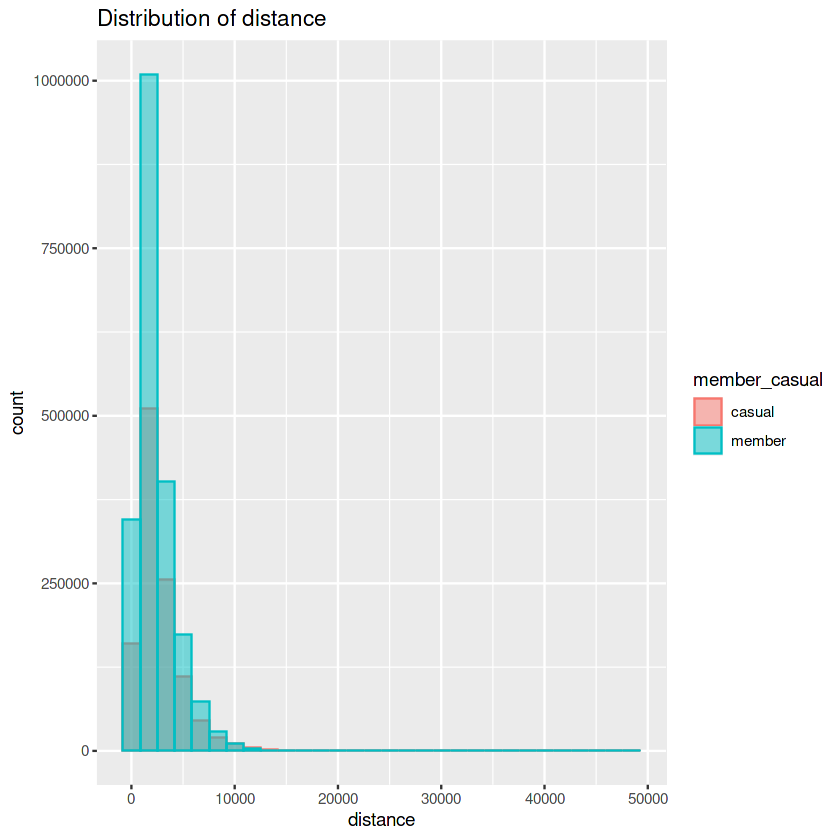

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



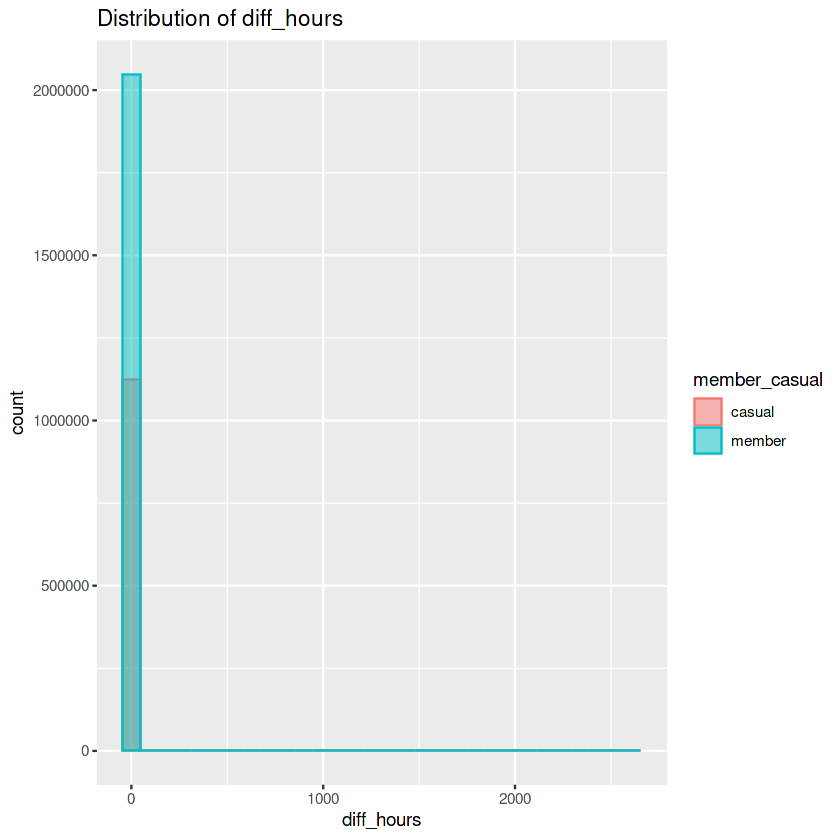

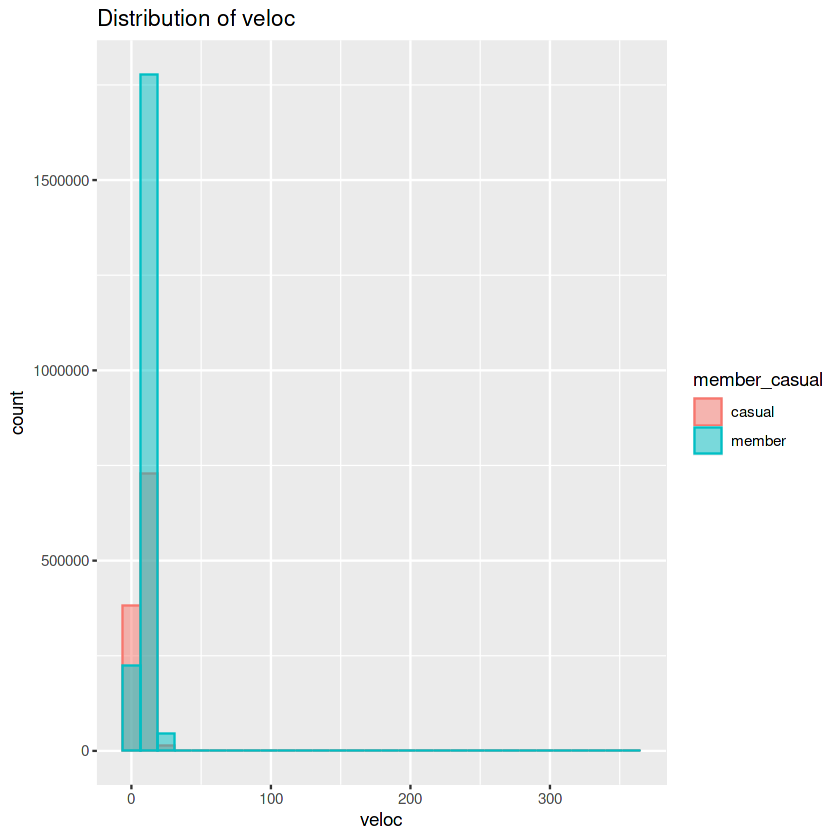

In [25]:
ggplot(data_2020, aes(x = distance, fill = member_casual, colour = member_casual)) + geom_histogram(alpha = 0.5, position = "identity") +labs(title= "Distribution of distance") #+ xlim=c(0,15) 
ggplot(data_2020, aes(x = diff_hours, fill = member_casual, colour = member_casual)) + geom_histogram(alpha = 0.5, position = "identity") +labs(title= "Distribution of diff_hours")
ggplot(data_2020, aes(x = veloc, fill = member_casual, colour = member_casual)) + geom_histogram(alpha = 0.5, position = "identity") +labs(title= "Distribution of veloc")

Skewness is high for distance and `diff_hours` 

Standard deviation is high for all numeric variables: 
 * `diff_hours` standard deviation is about 8x mean
 * `distance` represents 79 % of the mean 
 * `veloc` represents 36 % of the mean
 
 Consequentially a high coefficient  of variance. 
 
I know this data compiles very different subjects with different habits and I'm not expecting the data to be normally distributed.

Still I'll investigate  if there are outliers that are not a accurate representing, therefor compromising the importance of the metrics.

I'll try to "refocus" (reducing the data ) without losing important data.

# 6. Refocus

### Refocus distance

In [26]:

dist_ecdf <- ecdf(data_2020$distance)
dist_ecdf_cas <- ecdf(casual$distance)
dist_ecdf_mem <- ecdf(member$distance)
print(paste("percentile for 10 km :",round(dist_ecdf(10000),3)))
print(paste("percentile for 10 km for casual riders :",round(dist_ecdf_cas(10000),3)))
print(paste("percentile for 10 km for members :",round(dist_ecdf_mem(10000),3)))

[1] "percentile for 10 km : 0.992"
[1] "percentile for 10 km for casual riders : 0.987"
[1] "percentile for 10 km for members : 0.995"


#### Althoug the max distance travelled for 2020 is a little over 48 km, 99.2% of rides went for 10 km or less (>98% for both casual and members individually) 

### Refocus diff_hours

#### Max amonut of time spent on a bike is 2607 hours but 99.5 % of the data is bellow 3h

### Refocus veloc

In [27]:
veloc_ecdf <- ecdf(data_2020$veloc)
veloc_cas <- ecdf(casual$veloc)
velocecdf_mem <- ecdf(member$veloc)


print(paste("percentile for 25 km/h :",round(veloc_ecdf(25),3)))
print(paste("percentile for 25 km/h, in casual rides :",round(veloc_cas(25),3)))
print(paste("percentile for 25 km/h, in members rides :",round(velocecdf_mem(25),3)))

[1] "percentile for 25 km/h : 0.999"
[1] "percentile for 25 km/h, in casual rides : 1"
[1] "percentile for 25 km/h, in members rides : 0.999"


#### Alhough someone drinked away too many Red Bulls and went over 300 km/h, 99.9 % went bellow 25 km /h

In [28]:
data_2020_num  <- data_2020%>% filter(veloc<25 & distance < 10000 & diff_hours < 3)
casual <- data_2020_num%>% filter(member_casual == "casual")
member <- data_2020_num%>% filter(member_casual == "member")
stats(data_2020_num)
stats(casual,"casual")
stats(member,"members")
print(paste("skewness for distance :",round(skewness(data_2020_num$distance),3)))
print(paste("skewness for time spent :",round(skewness(data_2020_num$diff_hours),3)))
print(paste("skewness for velocity  :",round(skewness(data_2020_num$veloc),3)))


[1] "Stats for users"
          distance  diff_hours       veloc
nbr.val  3131002.0 3131002.000 3131002.000
nbr.null       0.0       0.000       0.000
nbr.na         0.0       0.000       0.000
min            1.0       0.017       0.001
max        10000.0       3.000      24.998
median      1857.3       0.221      10.054
mean        2378.1       0.313       9.723
std.dev     1777.5       0.321       4.267
coef.var       0.7       1.023       0.439
[1] "98.681 %"
[1] "Stats for casual"
          distance  diff_hours       veloc
nbr.val  1095957.0 1095957.000 1095957.000
nbr.null       0.0       0.000       0.000
nbr.na         0.0       0.000       0.000
min            1.0       0.017       0.001
max        10000.0       3.000      24.997
median      2041.3       0.312       8.426
mean        2523.2       0.454       8.089
std.dev     1826.4       0.444       4.610
coef.var       0.7       0.977       0.570
[1] "34.542 %"
[1] "Stats for members"
          distance  diff_hours       velo

Using about 88 % of all the initial data:
* Data is roughlly within 3 standard deviations from the mean 
* Coef.var has been reduce drastically
* Skeweness has also been reduce 

### Let's check distance again 

[1] "Dashed shows median and solid shows mean"


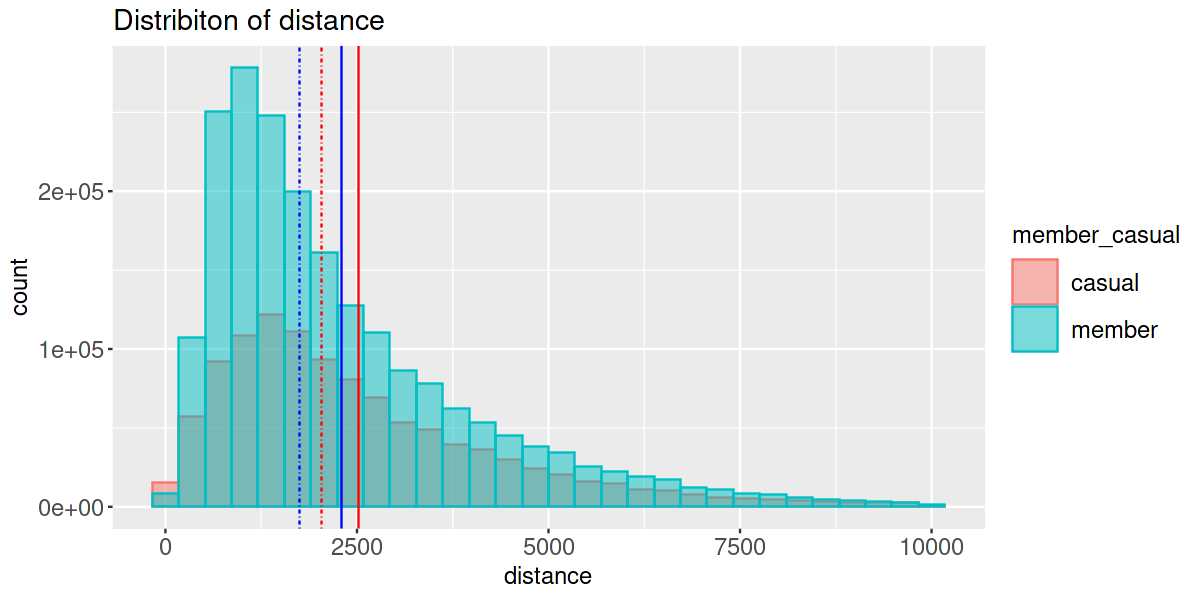

[1] "skewness for casual users distance : 1.298"
[1] "skewness for members disatance : 1.474"


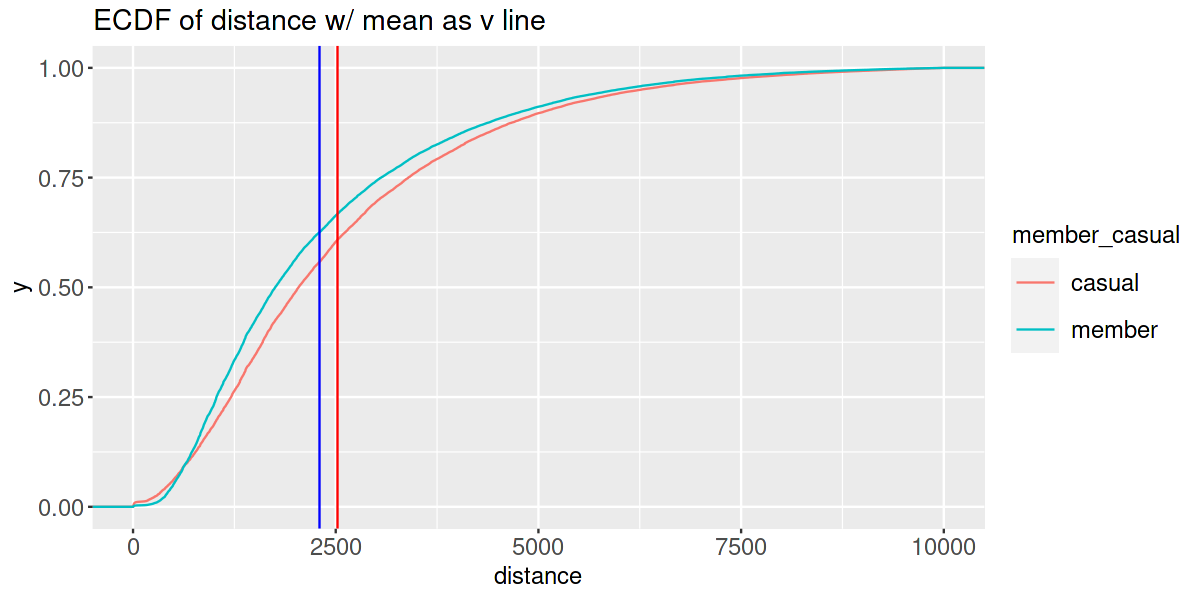

In [29]:
fig(10,5)
print("Dashed shows median and solid shows mean")
ggplot(data_2020_num, aes(x = distance, fill = member_casual, colour = member_casual)) + geom_histogram(alpha = 0.5, position = "identity",bins = 30)+ 
    labs("Distribution of distance") + 
geom_vline(xintercept=2523.2,color= "red")+
geom_vline(xintercept=2041.3,linetype='dotdash',color= "red")+
    geom_vline(xintercept=2300,color= "blue")+
geom_vline(xintercept=1753.8,linetype='dotdash',color= "blue")+
theme(title=element_text(size = 14) , axis.text=element_text(size=14),axis.title=element_text(size=14), legend.key.size=unit(1,"cm"),legend.text = element_text(size = 14))+ 
labs(title="Distribiton of distance")



ggplot(data_2020_num, aes(x=distance, colour=member_casual)) + stat_ecdf(geom = "step")+
geom_vline(xintercept=2520.8,color= "red")+
geom_vline(xintercept=2295.6,color= "blue")+
theme(title=element_text(size = 14) , axis.text=element_text(size=14),axis.title=element_text(size=14), legend.key.size=unit(1,"cm"),legend.text = element_text(size = 14))+ 
labs(title="ECDF of distance w/ mean as v line")
print(paste("skewness for casual users distance :",round(skewness(casual$distance),3)))
print(paste("skewness for members disatance :",round(skewness(member$distance),3)))




* mean is in both cases above median (about 6th quantile) 
* A clear concentration on lower distances (about 90 % of data is below 5k witch is half the range)
* higher values, showing in lower frequencies are pushing the means up, backed up by skew of 1.4 
* Conclusion : median is a better central tendency measure for distance 


### Let's check diff_hours again 

[1] "Dashed shows median and solid shows mean"


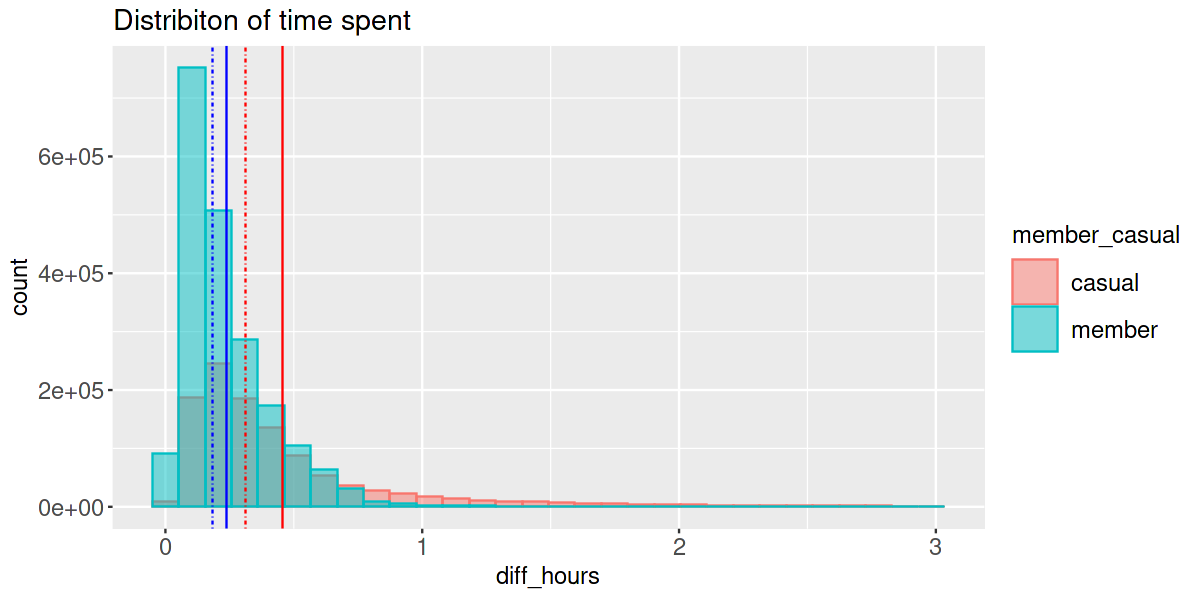

[1] "skewness for casual users time spent : 2.529"
[1] "skewness for members time spent : 2.742"


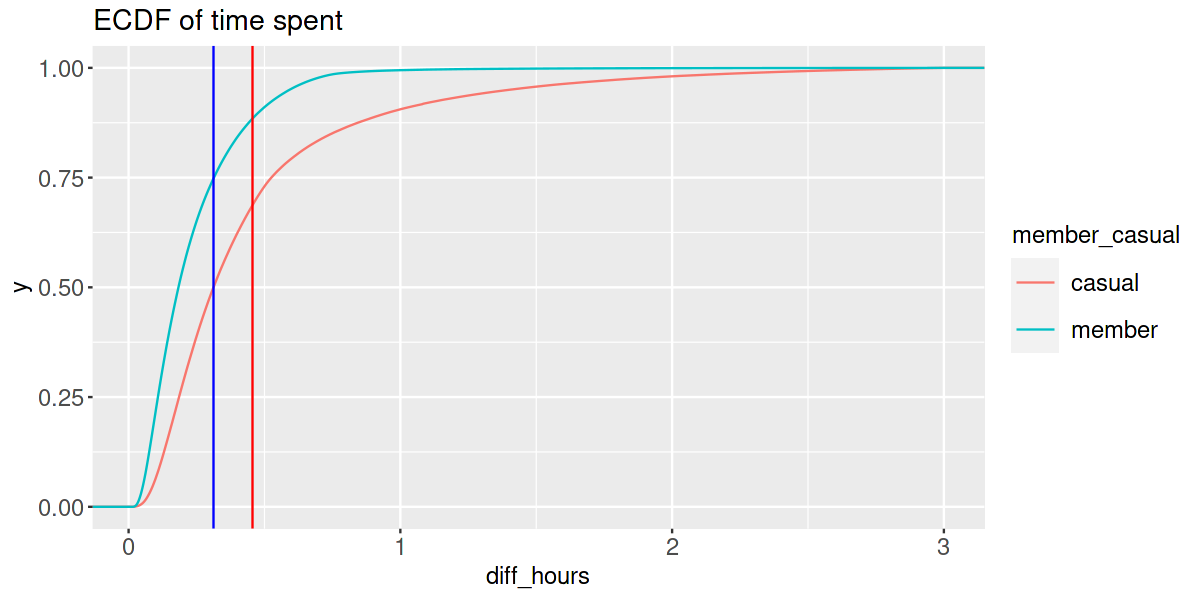

In [30]:
print("Dashed shows median and solid shows mean")


ggplot(data_2020_num, aes(x = diff_hours, fill = member_casual, colour = member_casual)) + geom_histogram(alpha = 0.5, position = "identity", bins =30)+ 
    labs("Distribution of diff_hours") + geom_vline(xintercept=0.454,color= "red")+
    geom_vline(xintercept=0.312,linetype='dotdash',color= "red")+
    geom_vline(xintercept=0.238,color= "blue")+
    geom_vline(xintercept=0.183,linetype='dotdash',color= "blue")+
    theme(title=element_text(size = 14) , axis.text=element_text(size=14),axis.title=element_text(size=14), legend.key.size=unit(1,"cm"),legend.text = element_text(size = 14))+ 
    labs(title="Distribiton of time spent")





ggplot(data_2020_num, aes(x=diff_hours, colour=member_casual)) + stat_ecdf(geom = "step")+
geom_vline(xintercept=0.455,color= "red")+
geom_vline(xintercept=0.313,color= "blue")+
theme(title=element_text(size = 14) , axis.text=element_text(size=14),axis.title=element_text(size=14), legend.key.size=unit(1,"cm"),legend.text = element_text(size = 14))+ 
labs(title="ECDF of time spent")


print(paste("skewness for casual users time spent :",round(skewness(casual$diff_hours),3)))
print(paste("skewness for members time spent :",round(skewness(member$diff_hours),3)))

* Huge concentration of the members rides ; over 90% of data is below 1h
* Huge gap between casual and members distribution->  casual users will go above 1h of use more often
* In both cases mean is above 60% and skew is  above 2 
* Conclusion: median is a better fit as a central tendency measure

[1] "Dashed shows median and solid shows mean"


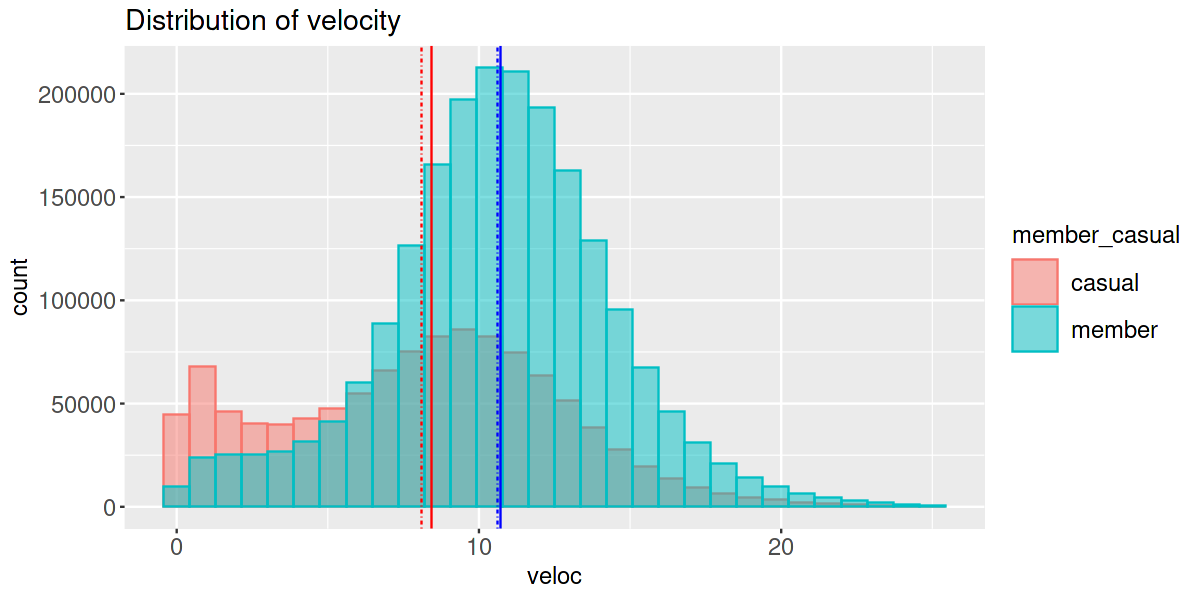

[1] "skewness for casual users velocity : 0.088"
[1] "skewness for members velocity : -0.128"


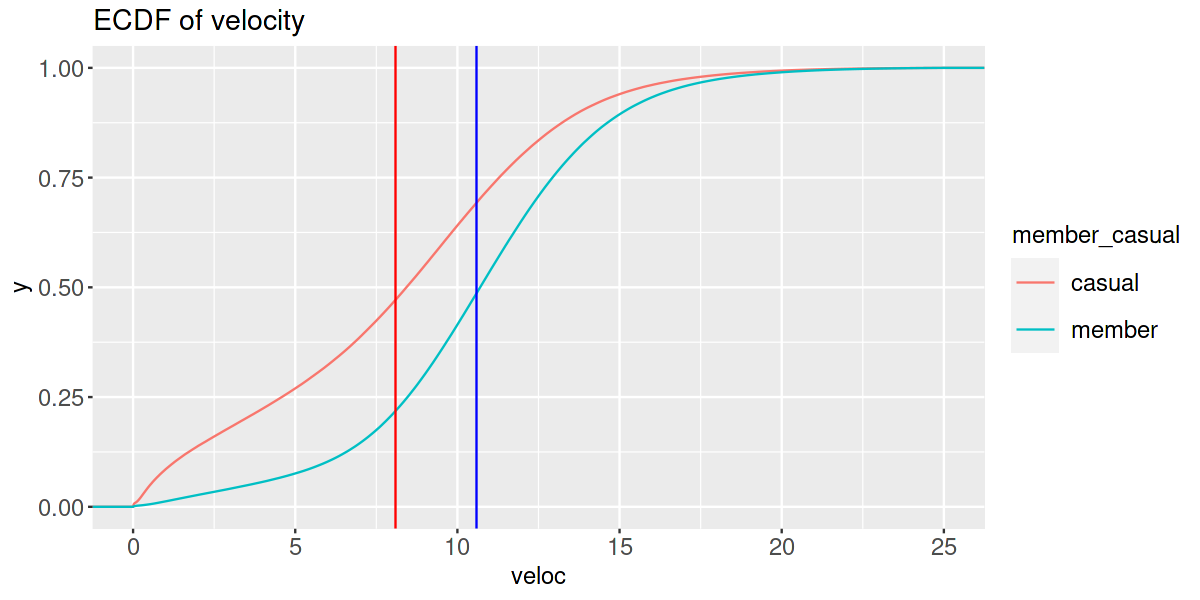

In [31]:
print("Dashed shows median and solid shows mean")
ggplot(data_2020_num, aes(x = veloc, fill = member_casual, colour = member_casual)) + geom_histogram(alpha = 0.5, position = "identity",bins=30)+ 
    labs("Distribution of veloc") + geom_vline(xintercept=8.089,linetype='dotdash',color= "red")+
    geom_vline(xintercept=8.426,color= "red")+
    geom_vline(xintercept=10.603,linetype='dotdash',color= "blue")+
    geom_vline(xintercept=10.7,color= "blue")+
    theme(title=element_text(size = 14) , axis.text=element_text(size=14),axis.title=element_text(size=14), legend.key.size=unit(1,"cm"),legend.text = element_text(size = 14))+ 
    labs(title="Distribution of velocity")


ggplot(data_2020_num, aes(x=veloc, colour=member_casual)) + stat_ecdf(geom = "step")+
geom_vline(xintercept=8.089,color= "red")+
geom_vline(xintercept=10.603,color= "blue")+
theme(title=element_text(size = 14) , axis.text=element_text(size=14),axis.title=element_text(size=14), legend.key.size=unit(1,"cm"),legend.text = element_text(size = 14))+ 
labs(title="ECDF of velocity")


print(paste("skewness for casual users velocity :",round(skewness(casual$veloc),3)))
print(paste("skewness for members velocity :",round(skewness(member$veloc),3)))

* Out of the 3 the `veloc`distribution is the closest to a normal distribution
* The members distribution resembles a Gaussian bell with mean and median very close 
* Casuals distribution is a bit skewed with lower speeds rides appearing more often the in the members

It is evident I'll need to use the other variables to find trends in the dataset. 

I'll use this factor variables  : `rideable_type` , `regions`, `started_month` & `weekday_start`.


Since the `diff_hours` varies so much I'll put my trust in `timeframe` and `time` columns. 
 +  `timeframe` represents numbers from 1-10 each has 10% of the `diff_hours` distribution (*quantiles*)
 + `time`repesents 4 portions of the day : morning (6h  - 11:59 ), afternoon (12h-15:59), evening(16h-19:59) and night(20h-5:59) 


# 7. Describing the data

### Vizualizing

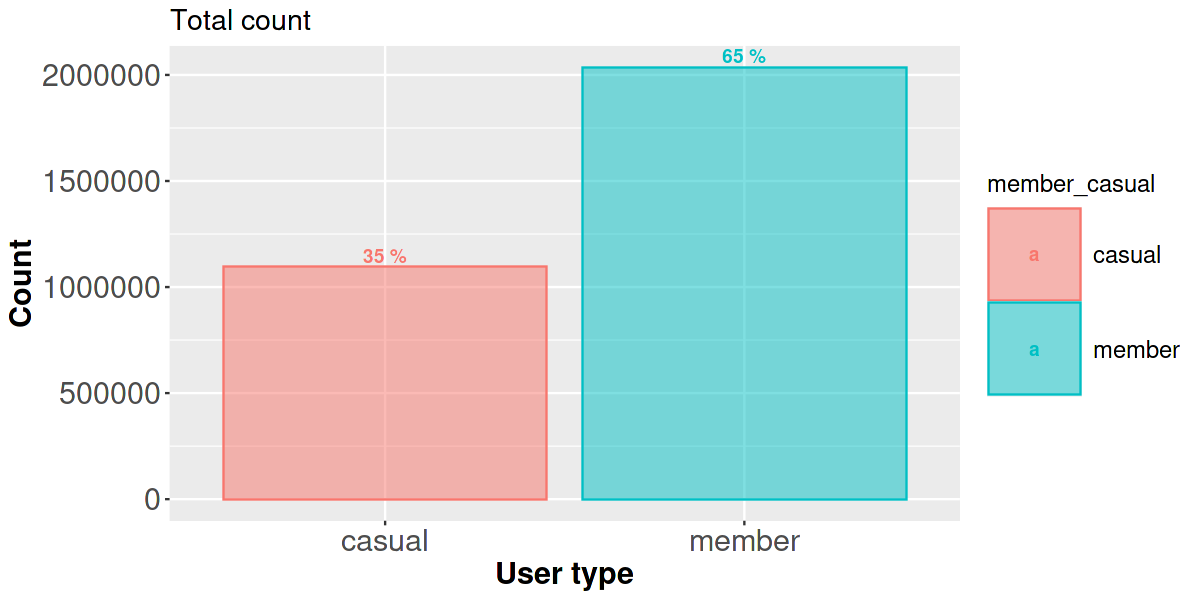

In [32]:
fig(10,5)
# total count
ggplot(data_2020_num, aes(x = member_casual, fill = member_casual, colour = member_casual)) +
geom_bar(alpha = 0.5, position = position_dodge()) +
geom_text( aes(label=paste(signif( tapply(..count.., ..x.., sum)/sum(..count..)*100, digits=3),"%")),
    stat="count", position = position_dodge(0.9), vjust = -0.3, fontface = "bold"  ) +
theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"), 
      legend.key.size=unit(2,"cm"),title=element_text(size = 14),legend.text = element_text(size = 14))+
labs(y="Count",x="User type",title="Total count")



* There are more members rides then casual. 
* Every time we compare frequency this fact will impose over casual riders trends.


* I'll be using a lot of bar plots: 
   + Red = Casual;  
   + Blue = members; 
   + The height of the bar represents frequency 
   + The percentage above is the relative frequency within each x value  

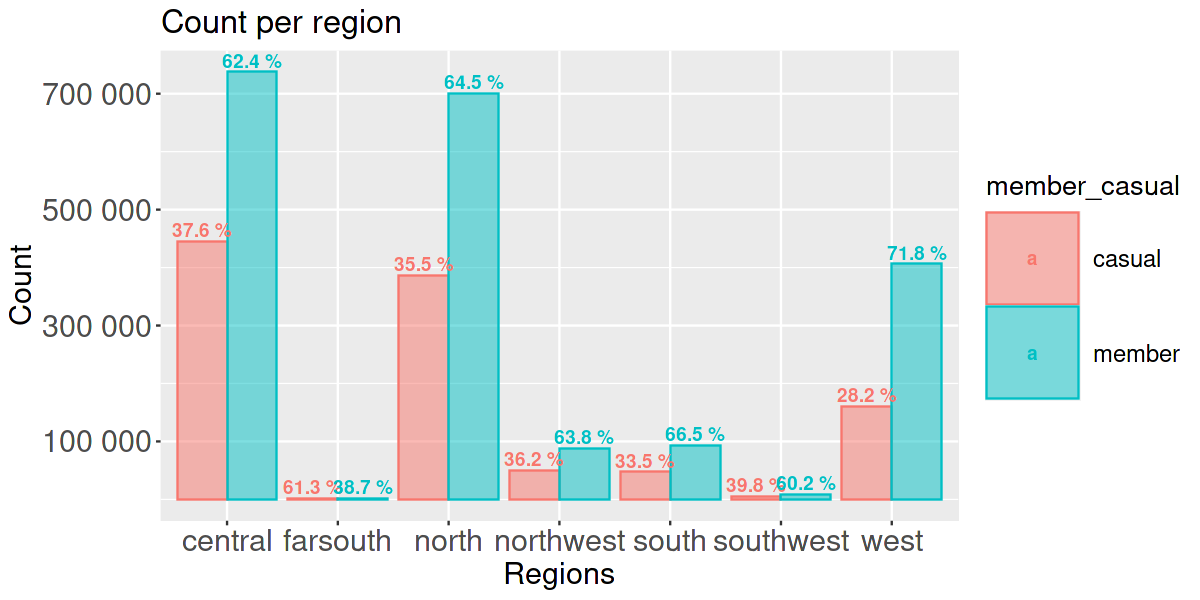

In [33]:

#Count per region
ggplot(data_2020_num, aes(x = regions, fill = member_casual, colour = member_casual)) +
geom_bar(alpha = 0.5, position = position_dodge()) + 
geom_text( aes(label=paste(signif((..count.. *100) / tapply(..count.., ..x.., sum)[as.character(..x..)], digits=3),"%")),
    stat="count", position = position_dodge(0.9), vjust = -0.3, fontface = "bold"  ) + 
theme(axis.text=element_text(size=18),axis.title=element_text(size=18), legend.key.size=unit(2,"cm"),title=element_text(size = 16),legend.text = element_text(size = 14) )+
labs(y="Count",x="Regions",title="Count per region")+

scale_y_continuous(breaks=c(100000,300000,500000,700000,800000,900000),label =c("100 000","300 000","500 000","700 000","800 000","900 000"))


* There are more members despite the region
* Central, North and West are the most cycled places. 

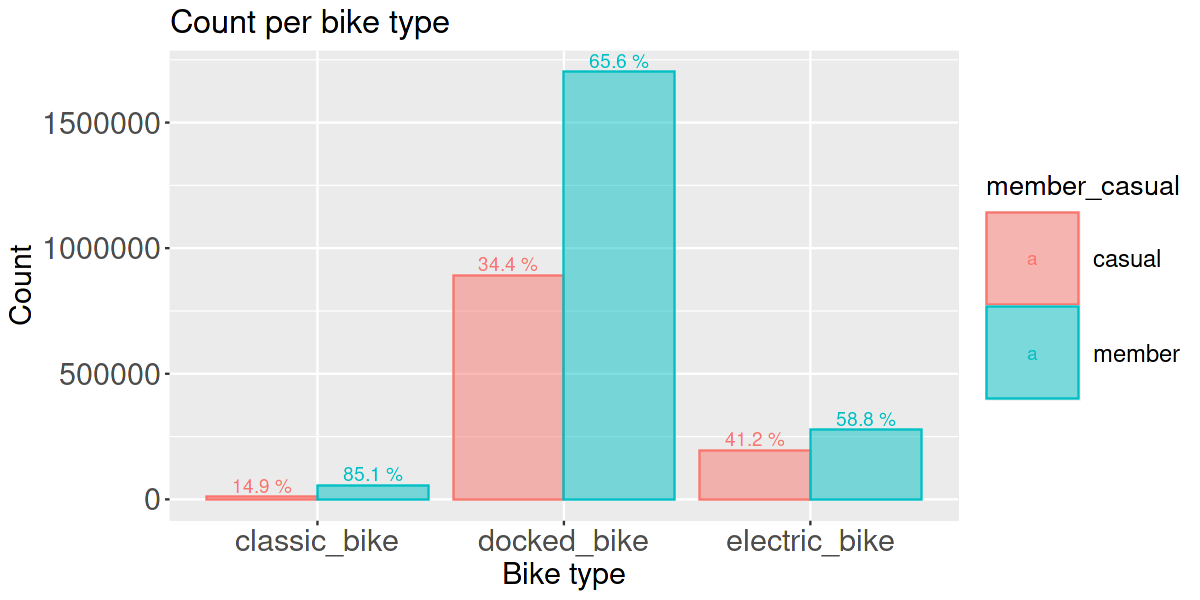

In [34]:

#Count per bike type
ggplot(data_2020_num, aes(x = rideable_type, fill = member_casual, colour = member_casual)) +
geom_bar(alpha = 0.5, position = position_dodge()) + 
geom_text( aes(label=paste(signif((..count.. *100) / tapply(..count.., ..x.., sum)[as.character(..x..)], digits=3),"%")),
    stat="count", position = position_dodge(0.9), vjust = -0.3  ) + 
theme(title=element_text(size = 16),legend.text = element_text(size = 14),
      axis.text=element_text(size=18),axis.title=element_text(size=18), 
      legend.key.size=unit(2,"cm"))+
labs(y="Count",x="Bike type",title="Count per bike type")


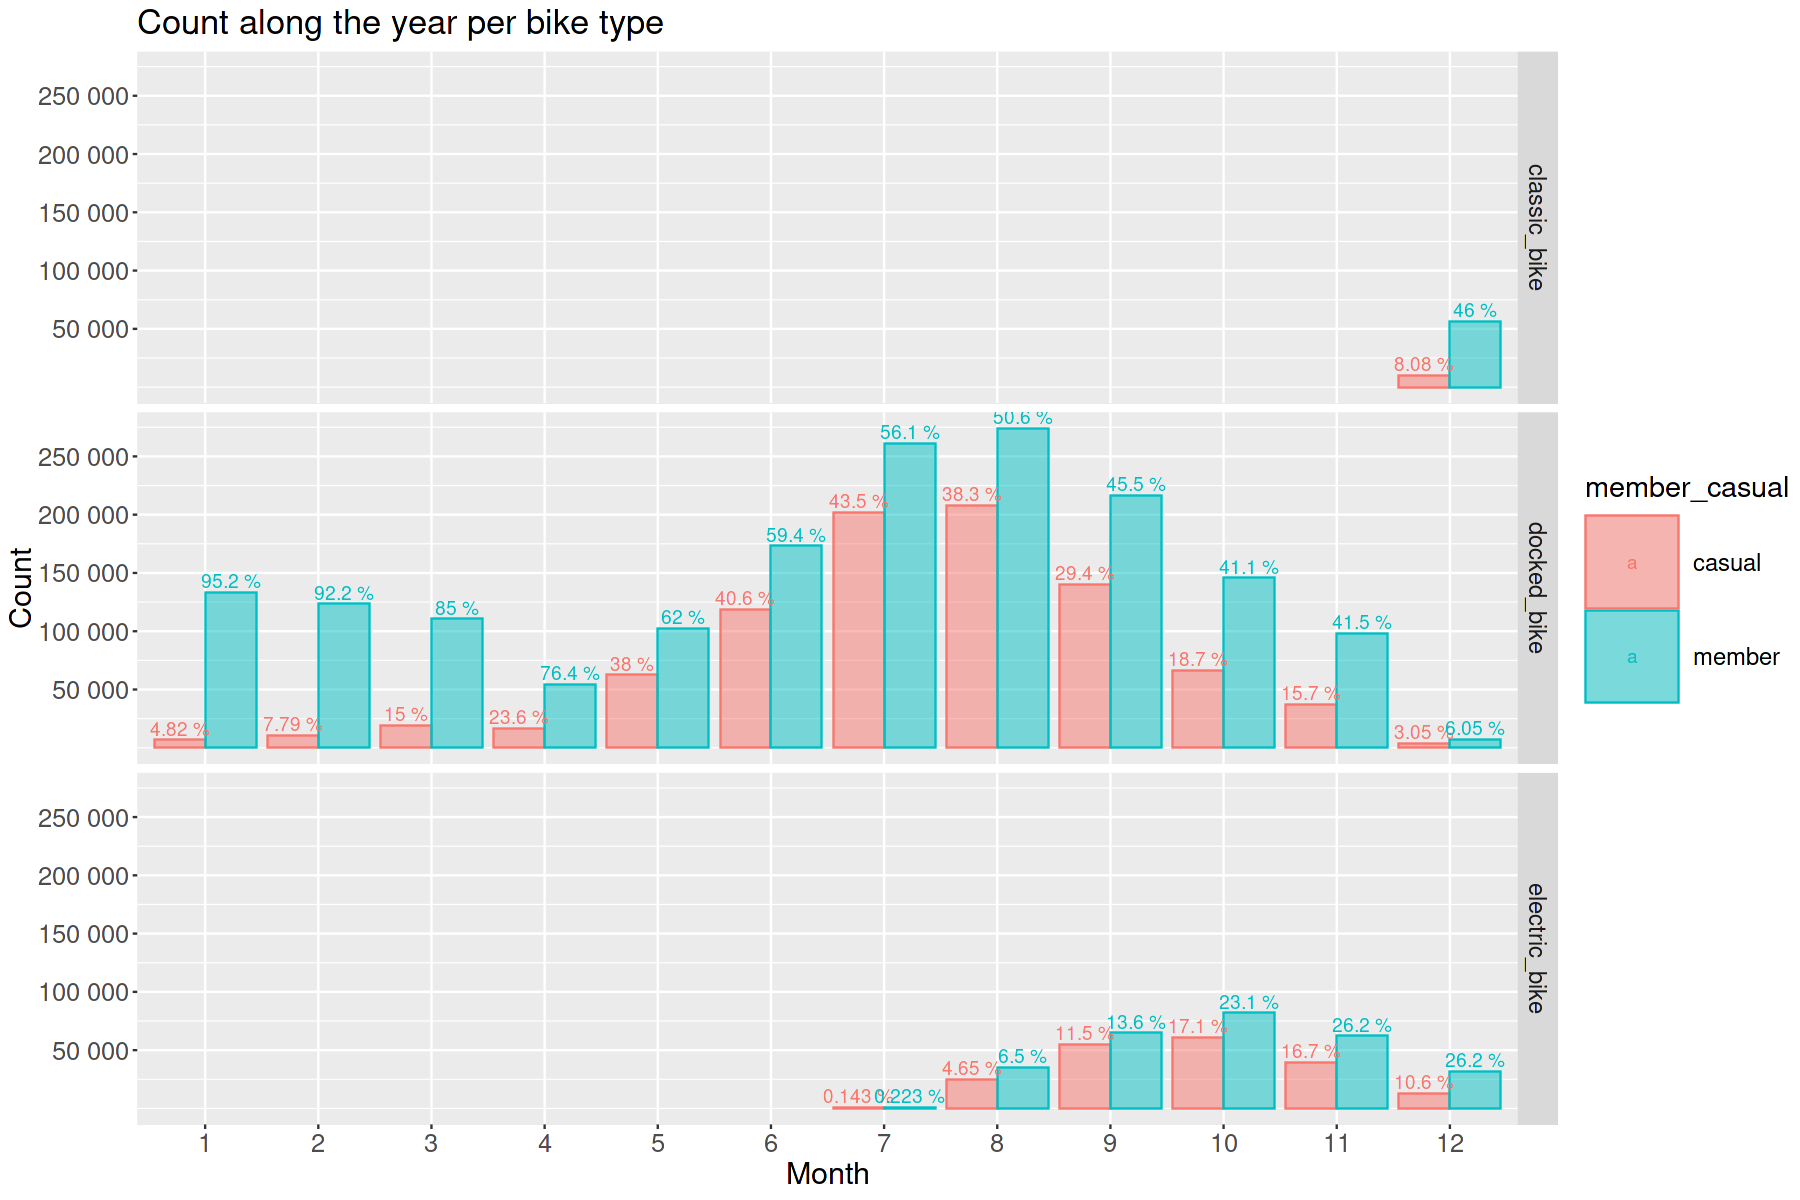

In [35]:
fig(15,10)
data <- data_2020_num %>% filter(started_month %in% c(6,7,8,9,10))
ggplot(data_2020_num, aes(x = started_month, fill = member_casual, colour = member_casual)) +
geom_bar(alpha = 0.5, position = position_dodge()) +

geom_text(
    aes(label=paste(signif((..count.. *100) / tapply(..count.., ..x.., sum)[as.character(..x..)], digits=3),"%")),
    stat="count", position = position_dodge(0.9),
    vjust = -0.3  ) + 

facet_grid(row=vars(rideable_type))+
scale_y_continuous(breaks=c(50000,100000,150000,200000,250000),label =c("50 000","100 000","150 000","200 000","250 000"))+


labs(y="Count",x="Month",title="Count along the year per bike type")+

theme(axis.text=element_text(size=15),axis.title=element_text(size=18,), 
      legend.key.size=unit(2,"cm"), legend.text = element_text(size = 14) ,
      title=element_text(size=17),strip.text.y=element_text(size=14))

* We can see that docked bikes are the most used 
* That's because electric bikes were introduced only in July and classic bikes in December
* The Chicago cyclist prefer the summer months 
* It's clear that casual riders hate the cold. In the first 3 months there absence was noticed.
* Casual riders seemed to like the electric bikes. 
* As the months evolved the portion of casual riders using electric increased. 
* For November and December, casual users used more electric bikes then any other bike.


In [36]:
my_summary <- function(data=data_2020_num,variable=c("member_casual"), base_data=data_2020_num){
    group_ <- syms(variable)
    summary <- data%>%
    select(!!!group_,distance,diff_hours,veloc)%>%
    group_by(!!!group_)%>%
    summarize(distance = median(distance),diff_hours=median(diff_hours), veloc=mean(veloc), Count=n() ,.groups="rowwise")%>%
    mutate(distance = round(distance,3),diff_hours=round(diff_hours,3), veloc=round(veloc,3),Count=round((Count/nrow(base_data))*100,2)) %>%
    arrange(-Count)
    return(summary)
}

difference <- function(data_1,data_2, row_1,col_1,row_2,col_2){
    diff <- as.numeric(data_1[row_1,col_1]) - as.numeric(data_2[row_2,col_2])
    return(diff)
}


user<- my_summary()
regions <- my_summary(variable=c("regions"))
rideable_type <- my_summary(variable=c("rideable_type"))
timeframe <- my_summary(variable=c("timeframe"))
started_month <- my_summary(variable=c("started_month"))
weekday_start <- my_summary(variable=c("weekday_start"))
time <- my_summary(variable=c("time"))

compare_g <- function(df1,df2,column, title_text = "Your forgot the title"){
    
    
    
    if(length(column) ==2){
        
        var_1 <- syms(column[1])
        var_2 <- syms(column[2])
        test_df1 <-  df1 %>% mutate(col_1 = paste(!!!var_1 ,!!!var_2 )) 
        test_df1 <- test_df1[,c(7,3,4,5,6)]
        
        test_df2 <-  df2 %>% mutate(col_1 = paste(!!!var_1 ,!!!var_2) ) 
        test_df2 <- test_df2[,c(7,3,4,5,6)]
    
        m <- merge(test_df1,test_df2, by="col_1")
        m <- m %>% arrange(-Count.x)
        m <- head(m,10)
    }else if(length(column) ==3) {
        
        var_1 <- syms(column[1])
        var_2 <- syms(column[2])
        var_3 <- syms(column[3])
        
        test_df1 <-  df1 %>% mutate(col_1 = paste(!!!var_1 ,!!!var_2 ,!!!var_3 ) ) 
        test_df1 <- test_df1[,c(7,3,4,5,6)]
        
        test_df2 <-  df2 %>% mutate(col_1 = paste(!!!var_1 ,!!!var_2 ,!!!var_3 ) ) 
        test_df2 <- test_df2[,c(7,3,4,5,6)]
        
        m <- merge(test_df1,test_df2, by="col_1")    
    }else{
    
    
    m <- merge(df1,df2, by=column) 
    colnames(m)[1]<- c("col_1")
    
    }
    

    #var <- syms(column)
    g_m <- m   %>% mutate(distance=distance.x-distance.y,diff_hours=diff_hours.x-diff_hours.y,veloc=veloc.x-veloc.y,Count=Count.x-Count.y)%>%
        select(col_1, distance,diff_hours,veloc,Count)
    
    g_m <- g_m %>% mutate(col_1 =    as.factor(col_1) )
    
    data <- melt(g_m)
    data_new <- data %>% mutate(Eval = ifelse(value>=0,ifelse(value>0,"Positive", "Null"),"Negative"))
    #names(data_new)<- c("col_1","variable","value","Eval")

    g_obj<- ggplot(data_new, aes(col_1, variable)) +
      geom_tile(aes(fill = Eval)) + 
      geom_text(aes(label = round(value, 3)),size=6) +
      theme_dark()+
      theme(axis.text=element_text(size=14))+
      #theme(axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"),aspect.ratio=0.8, legend.key.size=unit(2,"cm"),title=element_text(size=14))+
         scale_fill_manual(values = alpha(c( "red3","green3"), .9))+
        labs(y="Metrics",x="Subset", title= title_text)
      #theme(plot.margin = margin(4,3,4,3, "cm"),plot.background = element_rect(fill = "darkgrey"))
    if(length(column) ==1){
     return(g_obj)   
    }else{ return(g_obj)}
    
}


* I have create a function that compares subsets of casual rides with subsets of members rides by printing a simple table
*  Each column is a subset
*  Each row is a metric of that subset :
    * **Count** is relative frequency 
    * **veloc** is the average velocity of each ride 
    * **distance** is the median distance  
    * **diff_hours** is the median time spend
    
    
    
* The values we see are the difference between casual metrics and members metric for each subset
* Green represents *positive (higher value for casual )* and *red negative (lower value for members)

[1] "Eletric - docked"


Using col_1 as id variables

Using col_1 as id variables



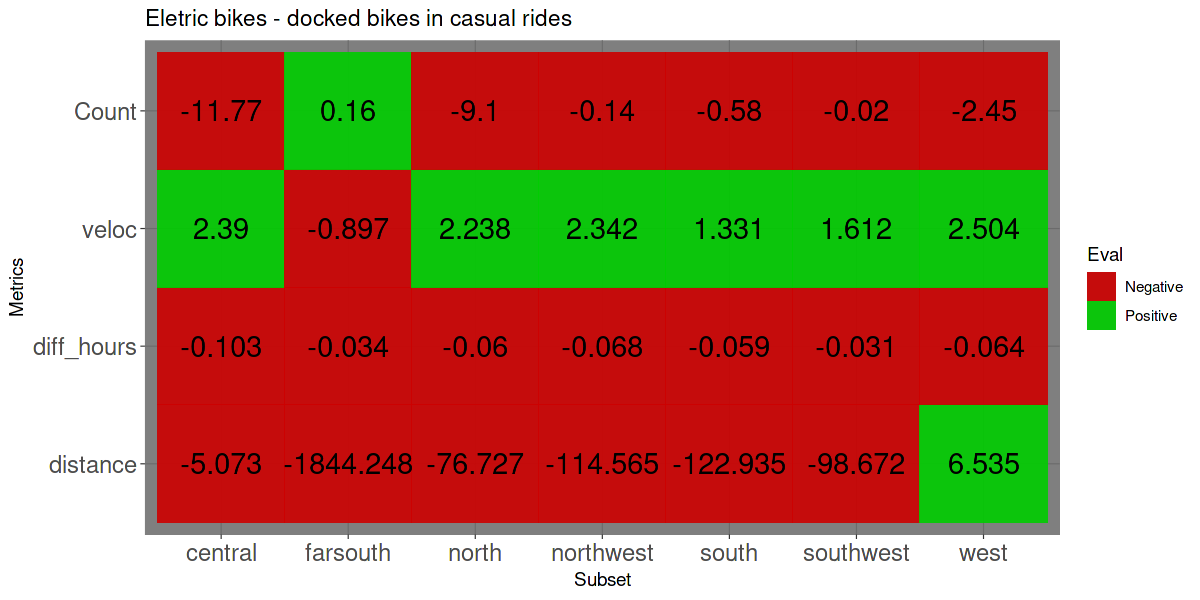

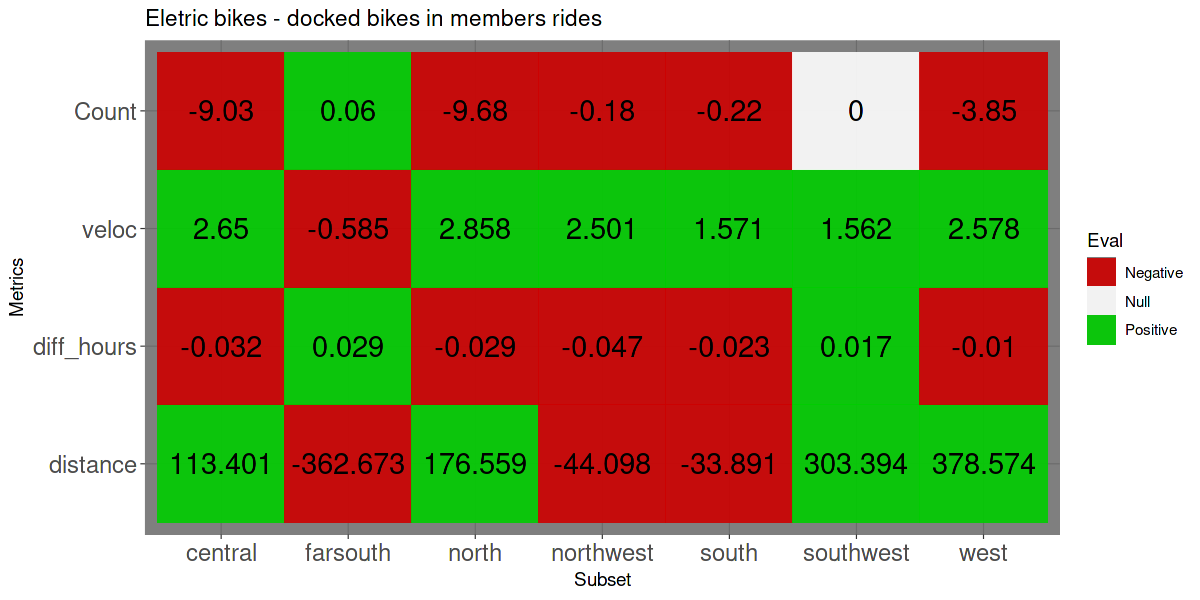

In [37]:
fig(10,5)
print("Eletric - docked")

#started_month %in% c(1,2,3,4,5,6,7)
data <- data_2020_num %>% filter(started_month %in% c(8,9,10,11,12) & rideable_type== "electric_bike" )
#data_b <- data_2020_num %>% filter(rideable_type== "docked_bike")
data_b <- data_2020_num %>% filter(started_month %in% c(8,9,10,11,12) & rideable_type== "docked_bike")

casual_t <- data %>% filter(member_casual== "casual")
member_t <- data %>% filter(member_casual== "member")

casual_b <- data_b %>% filter(member_casual== "casual")
member_b <- data_b %>% filter(member_casual== "member")


casual_t <- my_summary(casual_t,variable=c("regions"),casual)
member_t <- my_summary(member_t,variable=c("regions"),member)

casual_b <- my_summary(casual_b,variable=c("regions"),casual)
member_b <- my_summary(member_b,variable=c("regions"),member)


data_c_t <- compare_g(casual_t,casual_b,"regions", "Eletric bikes - docked bikes in casual rides")
data_c_t

#data_m_b <- compare_g(member_t,member_b,"regions", "Eletric bikes - docked bikes in members rides")
#data_m_b

 
    m <- merge(member_t,member_b, by="regions") 
    colnames(m)[1]<- c("col_1")
g_m <- m   %>% mutate(distance=distance.x-distance.y,diff_hours=diff_hours.x-diff_hours.y,veloc=veloc.x-veloc.y,Count=Count.x-Count.y)%>%
        select(col_1, distance,diff_hours,veloc,Count)
g_m <- g_m %>% mutate(col_1 =    as.factor(col_1) )
    data <- melt(g_m)

data_new <- data %>% mutate(Eval = ifelse(value>=0,ifelse(value>0,"Positive", "Null"),"Negative"))
    ggplot(data_new, aes(col_1, variable)) +
      geom_tile(aes(fill = Eval)) + 
      geom_text(aes(label = round(value,3)),size=6) +
      theme_dark()+
      theme(axis.text=element_text(size=14))+
      #theme(axis.text=element_text(size=14),axis.title=element_text(size=14),aspect.ratio=0.8, legend.key.size=unit(2,"cm"),title=element_text(size=14))+
       scale_fill_manual(values = alpha(c( "red3","white","green3"), .9))+
        labs(y="Metrics",x="Subset",title ="Eletric bikes - docked bikes in members rides" )

#### The next chart shows frequency for the column `timeframe` 
+ Each par of bins was made using percentiles (1 blue bin + 1 red bin = 10% of the data)
  * the first 10% are made of rides going for less then 4:43 min. 
  * Most of rides under 4:43 min were made by members. (First blue bin)


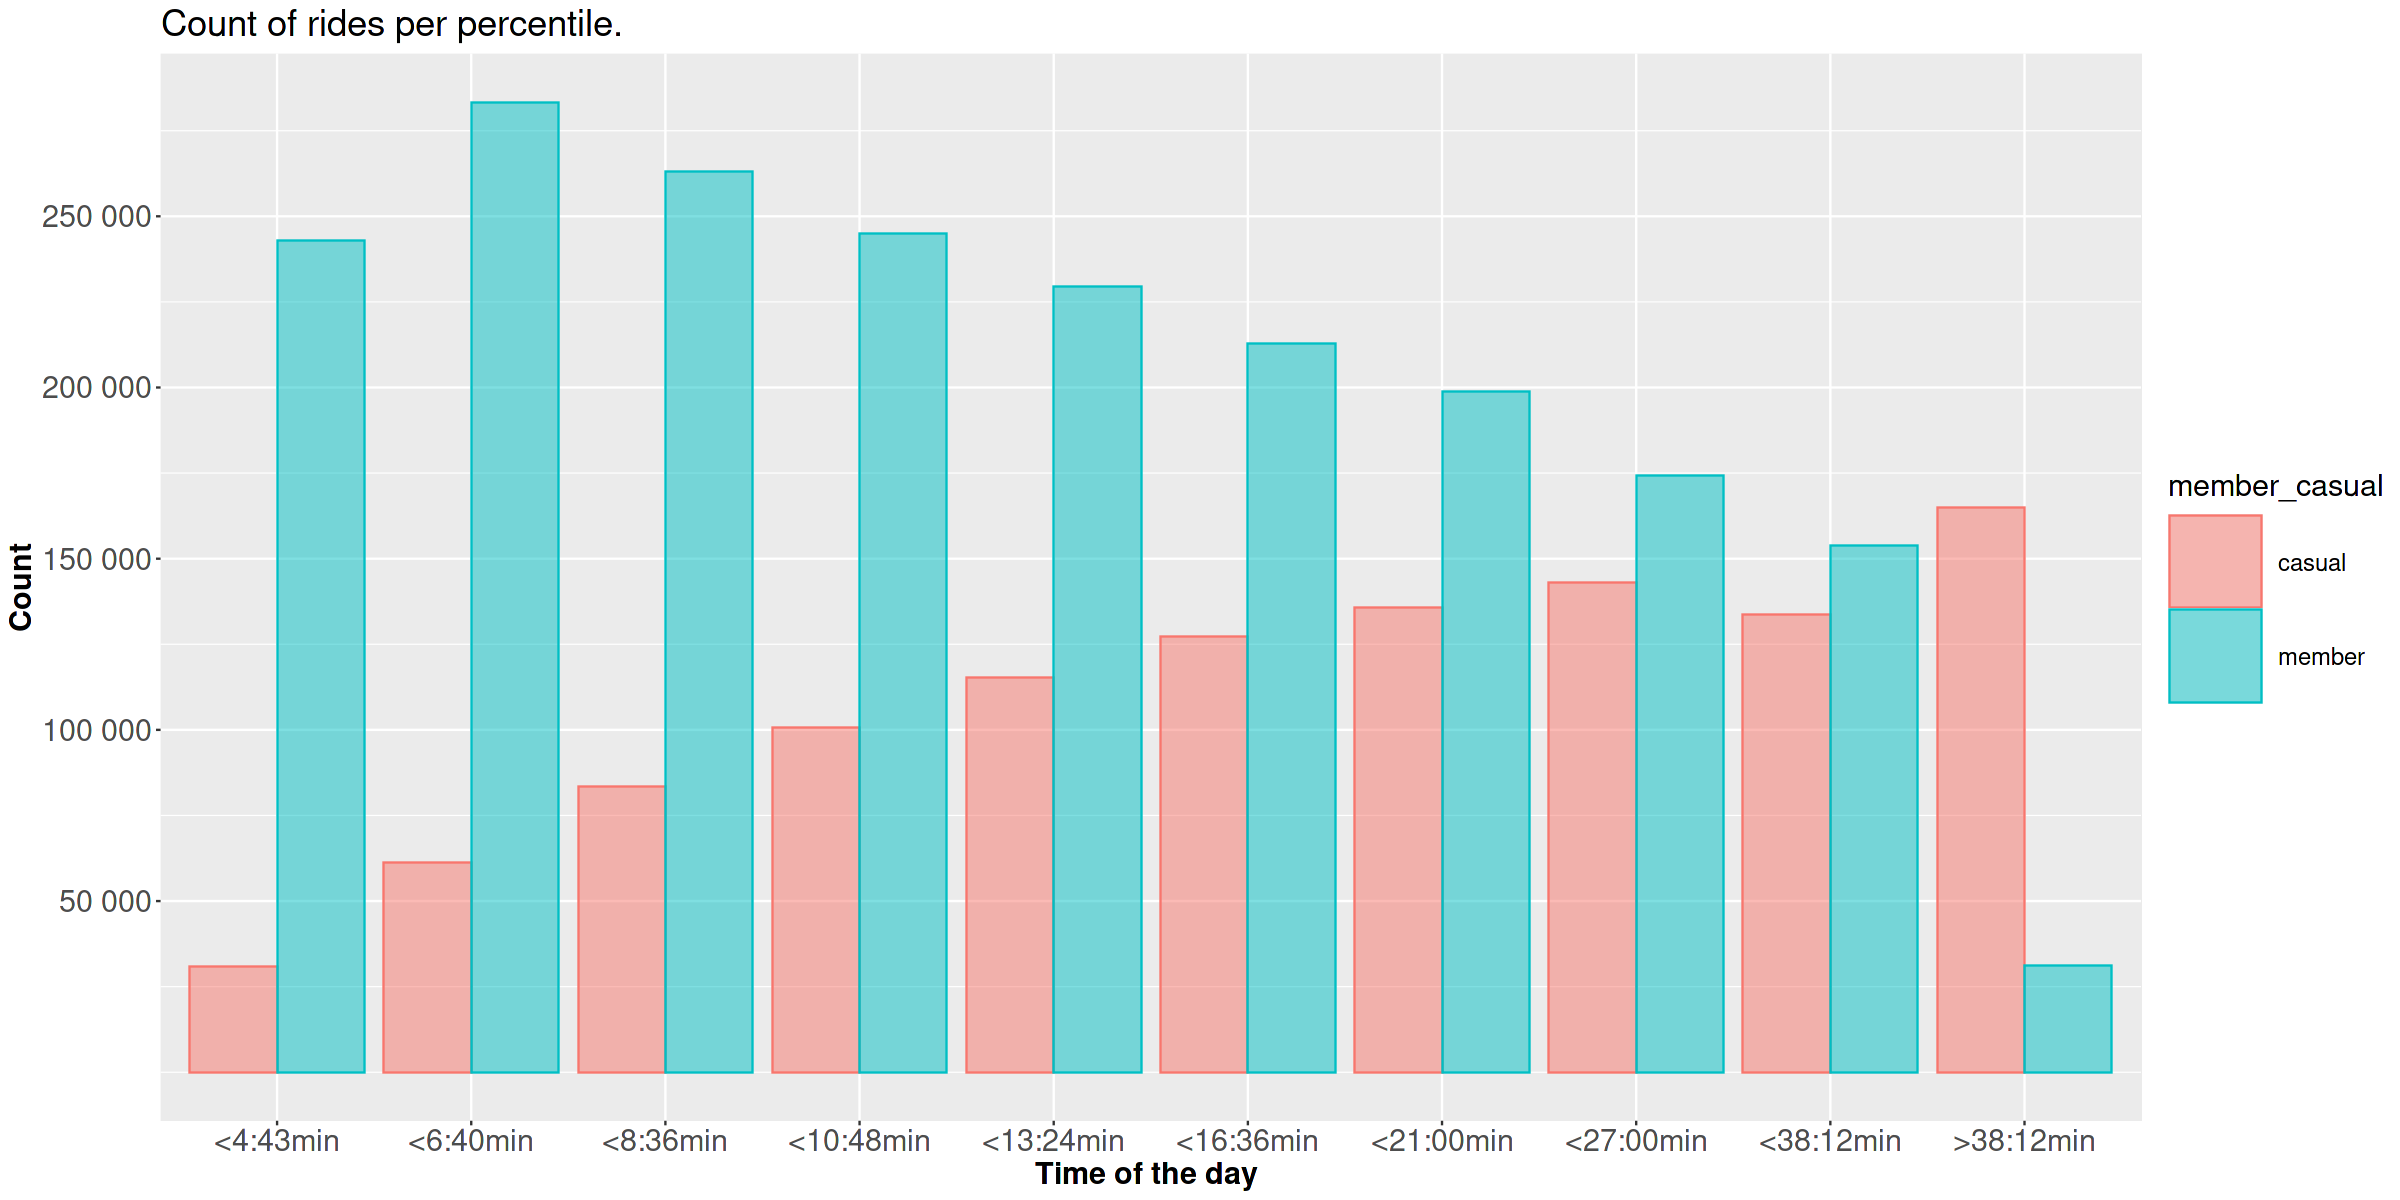

In [38]:
fig(20,10)
#Count per time of day
data <- data_2020_num
data <-data %>% mutate(timeframe = as.factor(timeframe))



ggplot(data, aes(x = timeframe, fill = member_casual, colour = member_casual)) +
geom_bar(alpha = 0.5, position = position_dodge())  +
theme(title=element_text(size = 18),
      legend.text = element_text(size = 14),legend.key.size=unit(2,"cm"),
      axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"))+
labs(y="Count",x="Time of the day ",title="Count of rides per percentile.")+

scale_y_continuous(breaks=c(50000,100000,150000,200000,250000),
                   label =c("50 000","100 000","150 000","200 000","250 000"))+
scale_x_discrete(breaks=c(1,2,3,4,5,6,7,8,9,10),
                 label =c("<4:43min","<6:40min","<8:36min","<10:48min","<13:24min","<16:36min","<21:00min","<27:00min","<38:12min",">38:12min"))



+ If we follow the blue bins we can see that members prefere fast rides. Most likely commuting from job to home. 
+ Following the red bins left to right  we can see it goes the opposite direction. 
  * Casual users prefer to spent their time with with the bikes
   
   
+ The chart bellow shows median distance for each day. Green represents casual and blue still members.
+ The reason why casual riders spend more time is because then also go for longer distances.  
  

In [39]:
casual_time <- data_2020_num %>% filter(member_casual == "casual")%>% select(started_at,distance)
member_time <- data_2020_num %>% filter(member_casual == "member") %>% select(started_at,distance)


casual_time <-casual_time %>%
  mutate(date_col = date(started_at)) %>%
  group_by(date_col) %>%
  summarize(count = median(distance))

member_time <-member_time %>%
  mutate(date_col = date(started_at)) %>%
  group_by(date_col) %>%
  summarize(count=median(distance))

don_casual <- xts(x = casual_time$count, order.by = casual_time$date_col)
don_member <- xts(x = member_time$count, order.by = member_time$date_col)

a <- cbind(don_casual,don_member)
dygraph(a, main ="Median distance per day") %>%
  dySeries("don_casual", label = "Casual") %>%
  dySeries("don_member", label = "Members") %>%
  dyOptions(stackedGraph = TRUE) %>%
  dyRangeSelector(height = 20)

HTML widgets cannot be represented in plain text (need html)

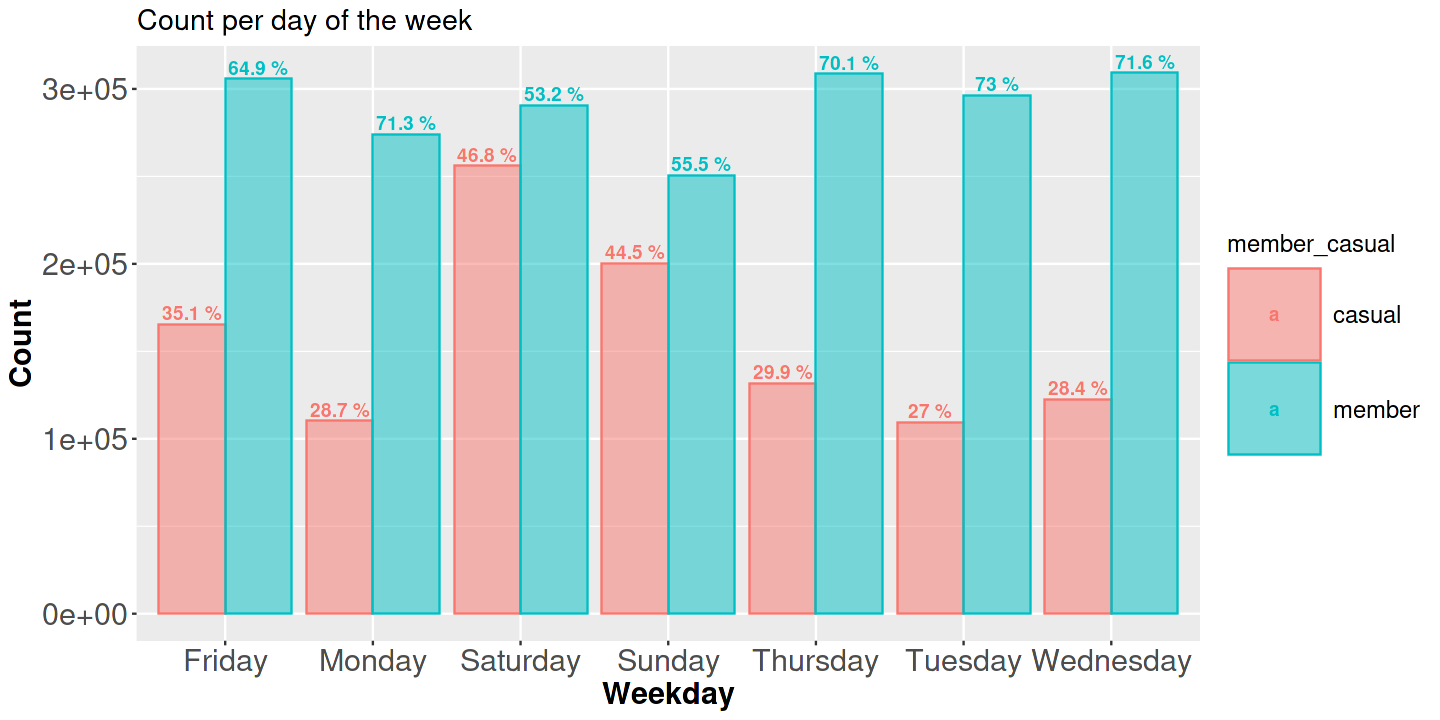

In [40]:
#Count per Weekday
fig(12,6)

ggplot(data_2020_num, aes(x = weekday_start, fill=member_casual,color=member_casual)) +
geom_bar(alpha = 0.5, position = position_dodge())+ geom_text( aes(label=paste(signif((..count.. *100) / tapply(..count.., ..x.., sum)[as.character(..x..)], digits=3),"%")),
    stat="count", position = position_dodge(0.9), vjust = -0.3,fontface = "bold"   ) +
theme(title=element_text(size = 14),legend.text = element_text(size = 14),axis.text=element_text(size=18),axis.title=element_text(size=18,face="bold"), legend.key.size=unit(2,"cm"))+
labs(y="Count",x="Weekday",title="Count per day of the week")

#scale_y_continuous(breaks=c(100000,200000, 300000,500000),label =c("100 000","200 000","300 000","500 000"))



### Summarizing per weekday  

*  `distance` -> median distance
* `diff_hours`-> median time spent 
* `veloc`-> average velocity 
* `count`-> relative frequency


First table for casual rides 

Second table for members

Third table shows casual rides metrics minus members metrics

In [41]:
weekday_start_casual <- my_summary(casual,variable=c("weekday_start"),casual)
weekday_start_member <- my_summary(member,variable=c("weekday_start"),member)

weekday_start_casual


weekday_start distance diff_hours veloc Count
1 Saturday      2123.373 0.352      7.506 23.36
2 Sunday        2058.378 0.358      7.403 18.29
3 Friday        2028.667 0.299      8.256 15.11
4 Thursday      2019.925 0.277      8.730 12.01
5 Wednesday     2028.447 0.277      8.791 11.18
6 Monday        1955.308 0.294      8.297 10.07
7 Tuesday       1996.632 0.278      8.693  9.98

weekday_start distance diff_hours veloc  Count
1 Wednesday     1711.022 0.175      10.814 15.19
2 Thursday      1714.121 0.175      10.795 15.17
3 Friday        1723.633 0.181      10.616 15.03
4 Tuesday       1686.960 0.172      10.816 14.55
5 Saturday      1922.554 0.212      10.137 14.28
6 Monday        1668.084 0.171      10.817 13.48
7 Sunday        1911.932 0.212      10.146 12.31

Using col_1 as id variables



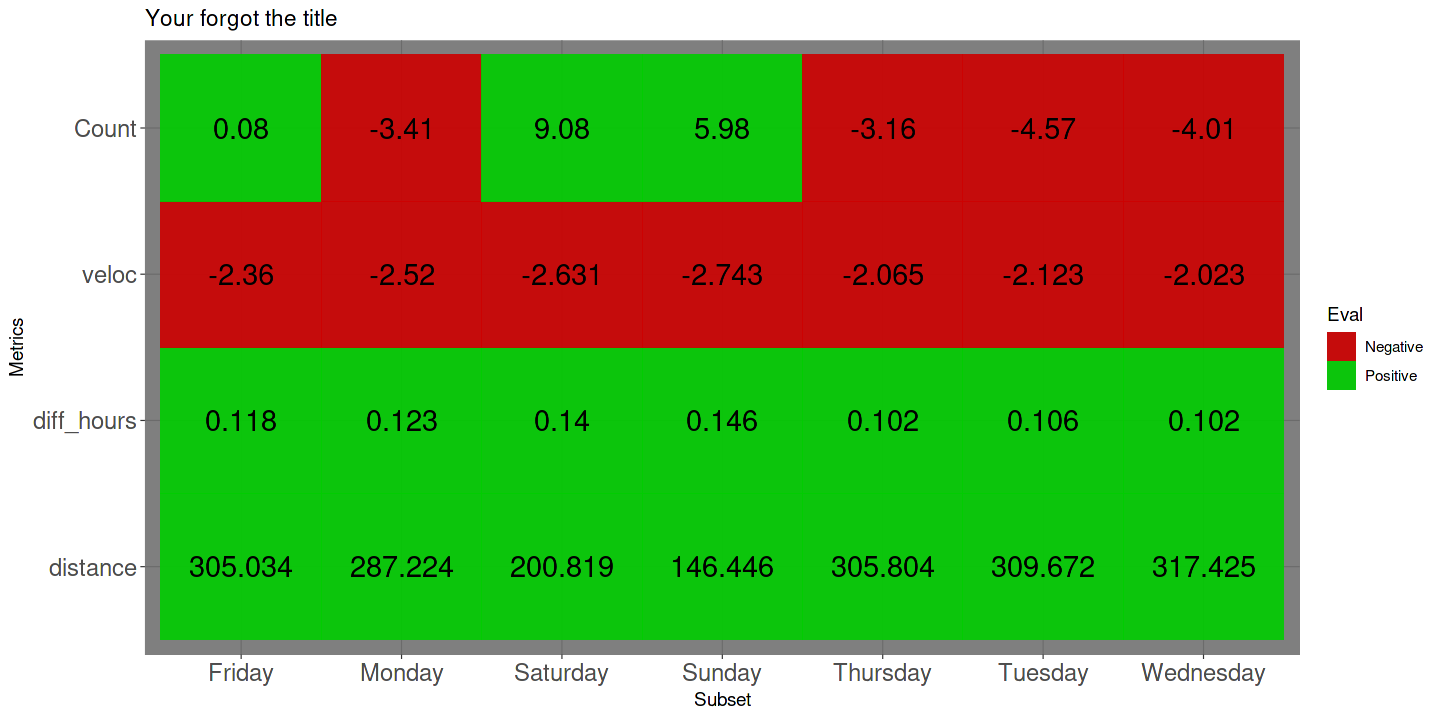

In [42]:
weekday_start_member

compare_g(weekday_start_casual,weekday_start_member,"weekday_start")


* Members have a very consistent usage of the bikes during the week. Averaging 10 min per ride at 10 km /h. That goes up to 12 min during weekend.
* Casual users take that to another level. 41 % of the rides happened  during Saturday and Sunday where they average 20min per ride on over 2km rides.

* The table shows that : 
    * casual riders are definitely slower then members going for longer rides everyday.
    * They also spend more time averaging 6 min more then members. 
* From the chart below is clear that members have clear habits with pics at 8h, 12h and 17h.
    * With  over 2 million rows finding this pics is very rare. 
    * When we look at casual riders line is smother because it compiles people with habits and many others who were just using it. 
    * Still we can see resemblance with the members meaning there are some casual users using bikes just like members. We just have to convince them.

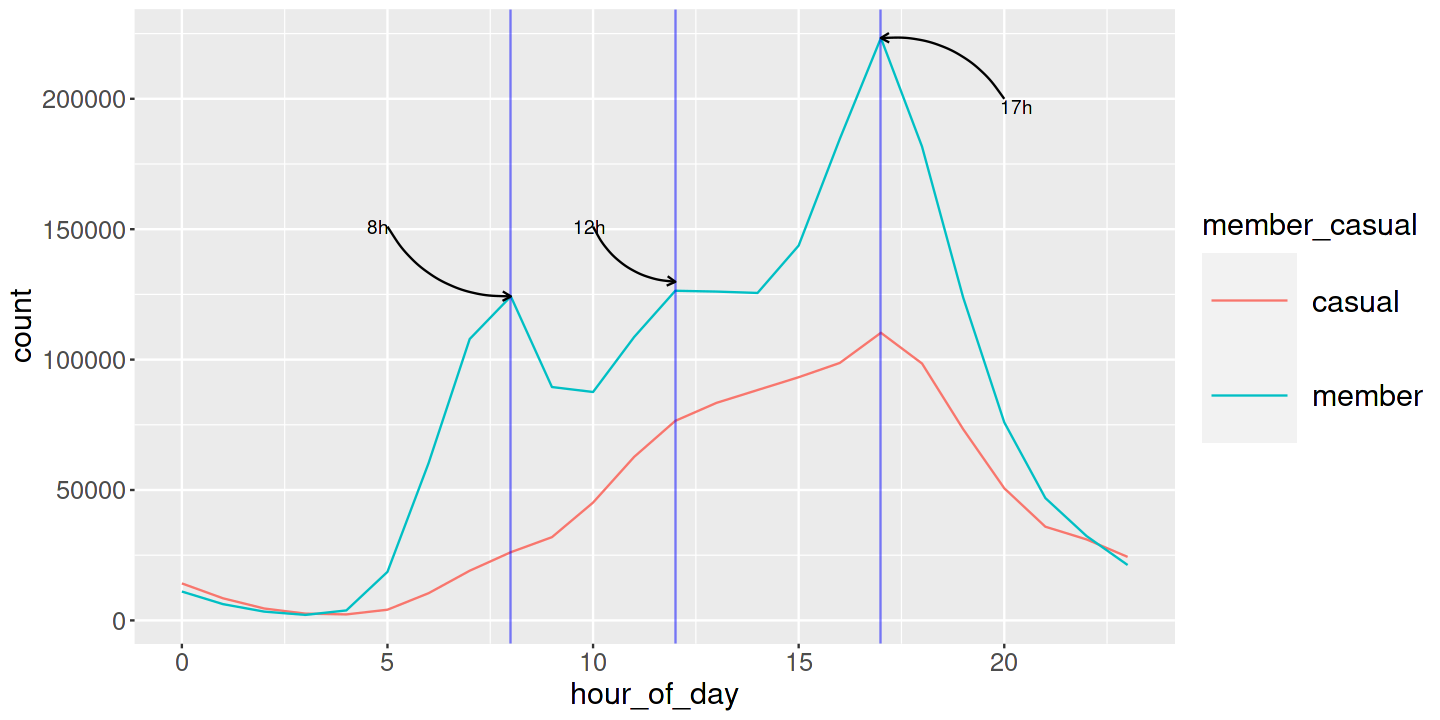

In [43]:
df <- data_2020_num%>% select(member_casual,started_at,distance,veloc, time)
df<- df %>% mutate(hour_of_day = hour(started_at)) %>% 
  group_by(member_casual,hour_of_day) %>% 
  summarise(meanDistance = mean(distance),meanVeloc=mean(veloc),count = n(), ,.groups="rowwise")



df_a <- data_2020_num%>% select(started_at, time)
df_a<- df_a %>% mutate(hour_of_day = hour(started_at))  %>% select(hour_of_day, time)
df_a <- df_a %>% group_by(hour_of_day,time) %>% 
  summarise(count = n(), ,.groups="rowwise") %>% select(hour_of_day,time)

df_t <- merge(df,df_a, by="hour_of_day", all.x=TRUE)



ggplot(df_t) + 
geom_line(aes(x=hour_of_day,y=count,color=member_casual))+
#scale_size_manual(values=c("Night"=1, "Afternoon"=3, "Evening"=4, "Morning"=2))+
theme(axis.text=element_text(size=15),axis.title=element_text(size=18),legend.title=element_text(size = 18),legend.text = element_text(size = 18),legend.key.size=unit(2, 'cm'))+
geom_vline(alpha = 0.5,xintercept=17,color= "blue")+
 annotate(
    geom = "curve", x = 20, y = 200000, xend = 17, yend = 223327, 
    curvature = .3, arrow = arrow(length = unit(2, "mm"))) +

  annotate(geom = "text", x = 19.9, y = 197000, label = "17h", hjust = "left")+
geom_vline(alpha = 0.5,xintercept=8,color= "blue")+
 annotate(
    geom = "curve", x = 5, y = 151000, xend = 8, yend = 124238, 
    curvature = .3, arrow = arrow(length = unit(2, "mm"))) +

  annotate(geom = "text", x = 4.5, y = 151000, label = "8h", hjust = "left")+
geom_vline(alpha = 0.5,xintercept=12,color= "blue")+

annotate(
    geom = "curve", x = 10, y = 151000, xend = 12, yend = 129829, 
    curvature = .3, arrow = arrow(length = unit(2, "mm"))) +

  annotate(geom = "text", x = 9.5, y = 151000, label = "12h", hjust = "left")


#### Comparing casual vs member

Using col_1 as id variables



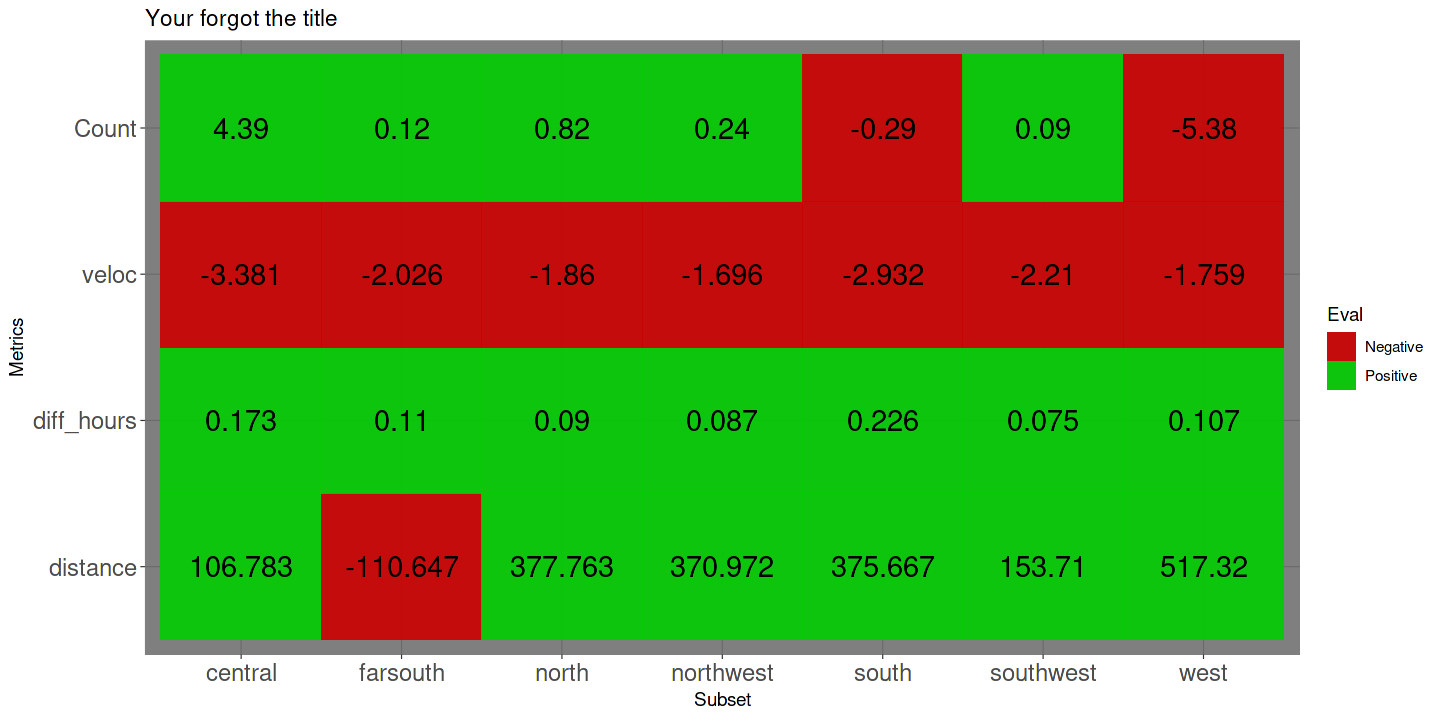

In [44]:


regions_casual <- my_summary(casual,variable=c("regions"),casual)
regions_member <- my_summary(member,variable=c("regions"),member)

data_1 <- compare_g(regions_casual,regions_member,"regions")
data_1

#data <- compare_g(regions_casual,regions_member,c("regions","time"))
#data


* casual users went longer on every state but Farsouth: west (+529m) & south (+433.9m), north(394.5m) {also the regions w/ most data}
* casual users also took longer to complete their rides on every state: south (+16 min) & central (+10 min)  with north (+5 min)
* Casual users were slower in every region : central(-0.344 km/h) north(-0.191 km/h) & west(-0.183km/h)

# 8. Correlation

In [45]:
install.packages("ggcorrplot")
# Loading
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [46]:
# 'casual'=1,  'member'=2
# 'central'=1,  'north'=2, 'west'=3 , 'south'=4,'northwest'=5 , 'southwest'=6, 'farsouth'=7
#'docked_bike'=1, 'electric_bike'=2, 'classic_bike'=3 
#'morning'=1, 'afternoon'=2, 'evening'=3,'night'=4

data_num <- data_2020_num


levels(data_num$weekday_start) <- c(1,2,3,4,5,6,7)
levels(data_num$member_casual) <- c(1,2) 
levels(data_num$regions) <- c(1,7,2,5,4,6,3)
levels(data_num$rideable_type) <- c(3,1,2)
levels(data_num$time) <- c(2,3,1,4)


data_num$member_casual <- as.numeric(data_num$member_casual)
data_num$regions <- as.numeric(data_num$regions)
data_num$weekday_start <- as.numeric(data_num$weekday_start)
data_num$started_month <- as.numeric(data_num$started_month)
data_num$rideable_type <- as.numeric(data_num$rideable_type)
data_num$timeframe <- as.numeric(data_num$timeframe)
data_num$time <- as.numeric(data_num$time)

data_num <- data_num[,c("rideable_type","regions","member_casual","time","timeframe","started_month","weekday_start","distance","diff_hours","veloc")]

casual_num <- data_num %>% filter(member_casual == "1" & distance <5000 & diff_hours<2)
member_num <- data_num %>% filter(member_casual == "2"& distance <5000 & diff_hours<2)
casual_num<- casual_num[,c("rideable_type","timeframe","regions","started_month","distance","veloc")]
member_num<- member_num[,c("rideable_type","timeframe","regions","started_month","distance","veloc")]

corr_viz <- function(data, text="Forgot the title"){
    corr <- round(cor(data), 3)
    ggcorrplot(corr,type = "lower", lab = TRUE)+
    labs(title =text)
    
}

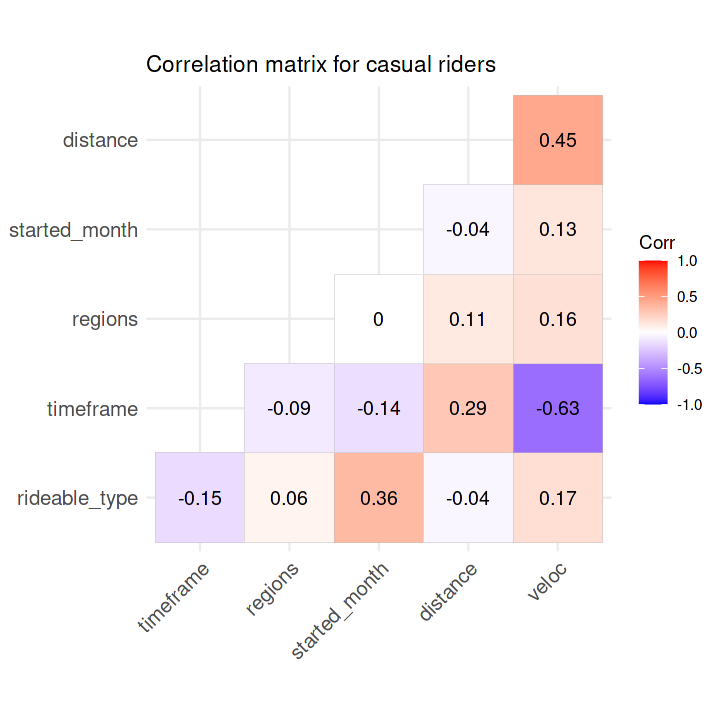

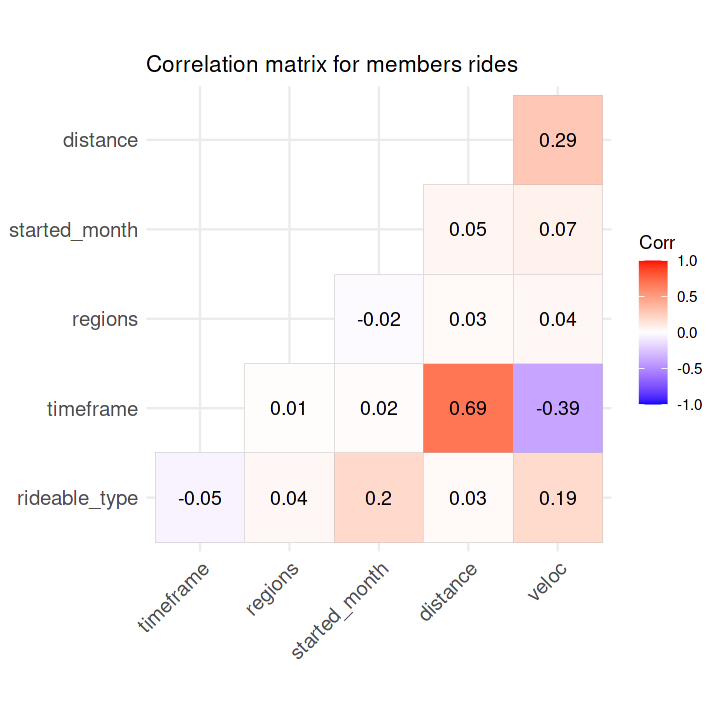

In [47]:
fig(6,6)
corr_viz(casual_num,"Correlation matrix for casual riders")
corr_viz(member_num,"Correlation matrix for members rides")



+ *Remember:* `timeframe` represents each quantile of time spent (`diff_hours`).


+ The biggest differences for casual riders are `timeframe`~ `distance` (-0.4 p.p.) & `timeframe` ~`veloc` (-0.24 p.p)
    * Members tend to spend more time in longer distances trips (as expected). 
    * That is not so obvious in the casual case because they seem to have a huge tendency to go slower in longer distance trips.    
    * Given the correlation values between `distance`, `veloc` and `timeframe`, instead of the usual : longer distance => more time spent; It is safer to say : 
        * Casual users go faster when the distance is bigger and slower when the time spent is bigger.  
        
    
+ `rideable_type` (type of bike) and month have a higher correlation in the casual users distribution because the higher bike value (3 for electric bike ) is correlated with higher month values (the end of the year). 
    + This value is lower in members because during the end of year they continued using more docked bikes then electric ones, unlike casual users. 

# 9. Map

In [48]:
data <- full_data_2020[,c("index_start","start_lat","start_lng")]
mapping <- data[!duplicated(data),]

In [49]:
map_data <- data_2020_num %>% group_by(member_casual,index_start) %>% 
            summarize(count = n(), 
                      MedianDistance = median(distance), 
                      MedianDiff_hours = median(diff_hours),
                      MeanVeloc =mean(veloc), .groups="rowwise")
map_data <- merge(map_data,mapping,by = c("index_start"),all.x=TRUE,all.y=FALSE)



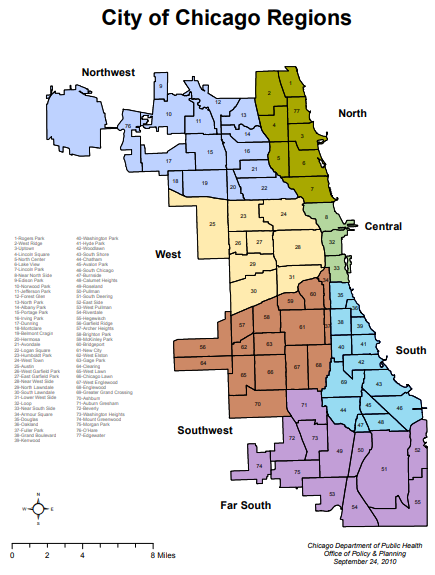

* The map above shows the regions of Chicago according to Chicago Department of Public Health, made in 2010
* In the map bellow each point shows a spot where a trip was started. There are 398,000 spots in the dataset.  
    * Cleary the Central, North and West regions are dominating the cycling game.
    * Also the members (blue) dominate this areas. (members account for 64 % of the dataset.)

Source : http://tile.stamen.com/terrain/10/261/379.png

Source : http://tile.stamen.com/terrain/10/262/379.png

Source : http://tile.stamen.com/terrain/10/263/379.png

Source : http://tile.stamen.com/terrain/10/261/380.png

Source : http://tile.stamen.com/terrain/10/262/380.png

Source : http://tile.stamen.com/terrain/10/263/380.png

Source : http://tile.stamen.com/terrain/10/261/381.png

Source : http://tile.stamen.com/terrain/10/262/381.png

Source : http://tile.stamen.com/terrain/10/263/381.png



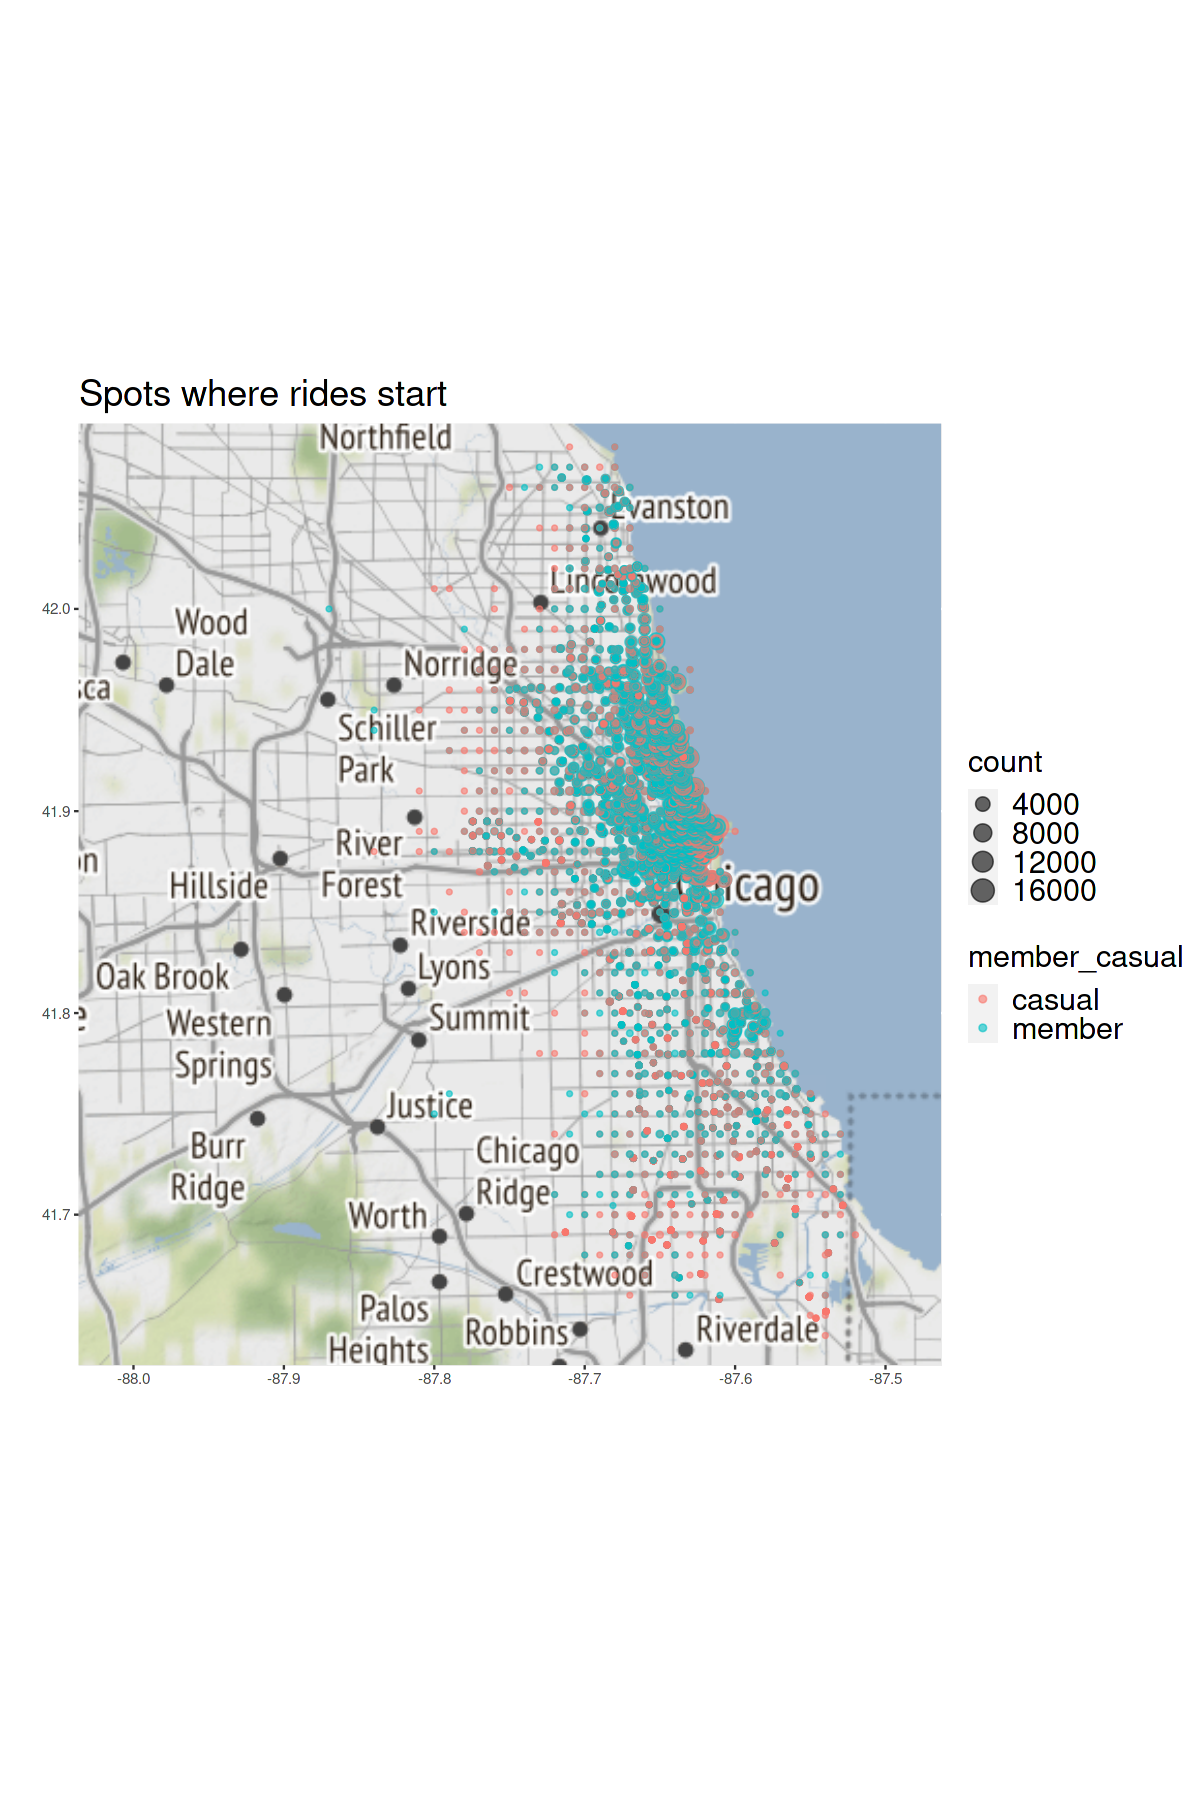

In [50]:
fig(10,15)
map_obj <-get_stamenmap(
   bbox = c(left = -88.0365, bottom = 41.6253, right = -87.4631, top = 42.0915),
    maptype = "terrain")


 #plot

ggmap(map_obj)+
geom_point(data=map_data,aes(x=start_lng, y=start_lat,color = member_casual, size=count), alpha=0.6) + 
theme(legend.text=element_text (size=18),legend.title=element_text (size=18), title=element_text(size=18))+ 
labs(title= "Spots where rides start", x="", y="")


* Each spot has a value for `count` (the amount of trips that started at that point)
* Also `MedianDistance` (median distance of trips starting there)
* And median time spent.


* For the next map I filtered the data to show spots with a median time spent above 40min. 
    + People using this spots represented bellow seemed to prefer trips that go around 40min and more.
    + Note that most of them are red indicating casual users.
    + The size of the point shows how frequently it was used.

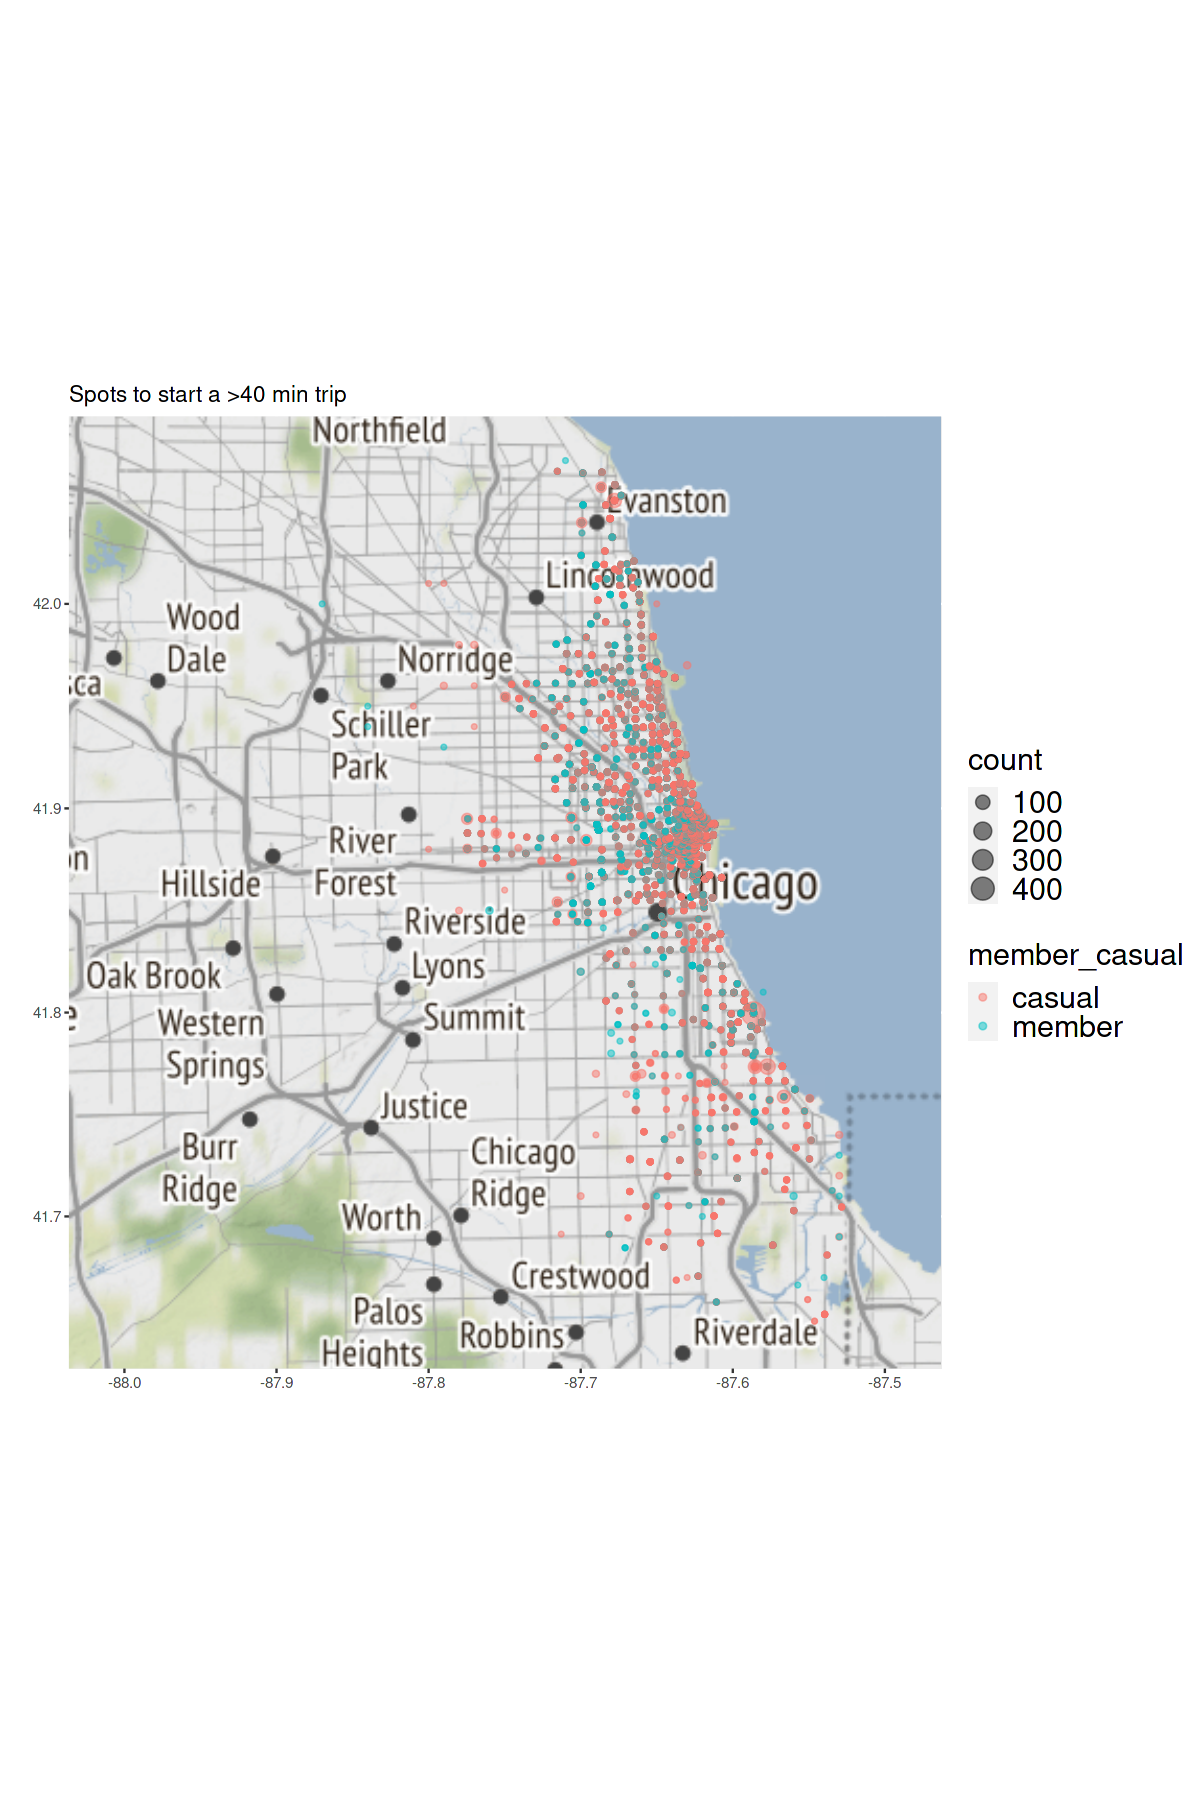

In [51]:

temp <- map_data %>% filter(MedianDiff_hours >0.65 ) %>% arrange(-count)

ggmap(map_obj)+
geom_point(data=temp,aes(x=start_lng, y=start_lat,color = member_casual, size=count), alpha=0.5) + 
theme(legend.text=element_text (size=18),legend.title=element_text (size=18))+
labs(title= "Spots to start a >40 min trip", x="", y="")